In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons
!pip install imbalanced-learn
!pip install joblib
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install xgboost --pre
!pip install pytorch_tabnet
!pip install catboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible

## Imports

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.metrics import F1Score
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model

import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from sklearn.utils import class_weight
from tensorflow.keras import backend as K

from keras.layers import LeakyReLU

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Competition/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Competition/test.csv')

In [ ]:
train_data.shape

(5250, 1201)

In [ ]:
test_data.shape

(2250, 1201)

In [ ]:
train_data.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [ ]:
test_data.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000


# Exploratory data analysis


## Class imbalance check

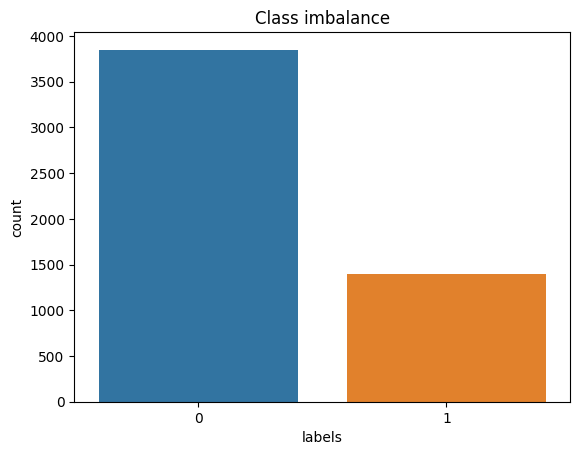

In [ ]:
# Class imbalance check
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_data, x="labels")
plt.title("Class imbalance")
plt.show()


In [ ]:


print(train_data['labels'].value_counts())

0    3850
1    1400
Name: labels, dtype: int64


# Checking mean and SD

In [ ]:
# mean
feature_means = train_data.iloc[:, 1:].mean()

# Standard deviation
feature_stds = train_data.iloc[:, 1:].std()


print("Feature Means:\n", feature_means)
print("\nFeature Standard Deviations:\n", feature_stds)


Feature Means:
 f_0       0.385453
f_1       0.086769
f_2       0.317084
f_3       0.400414
f_4       0.093063
            ...   
f_1195   -0.156475
f_1196   -0.096026
f_1197    0.372260
f_1198   -0.222551
f_1199    0.006532
Length: 1200, dtype: float64

Feature Standard Deviations:
 f_0       0.929075
f_1       0.898979
f_2       0.969380
f_3       0.954504
f_4       0.968625
            ...   
f_1195    1.019384
f_1196    0.913732
f_1197    0.944429
f_1198    0.973640
f_1199    0.897006
Length: 1200, dtype: float64


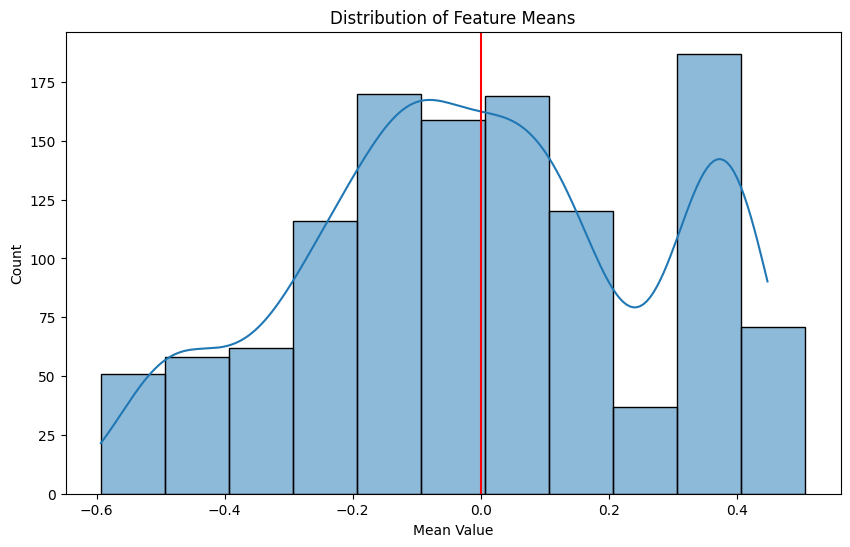

In [ ]:
# mean check

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10,6))
sns.histplot(feature_means, kde=True, binwidth=0.1)
plt.axvline(0, color='red')
plt.title('Distribution of Feature Means')
plt.xlabel('Mean Value')
plt.show()


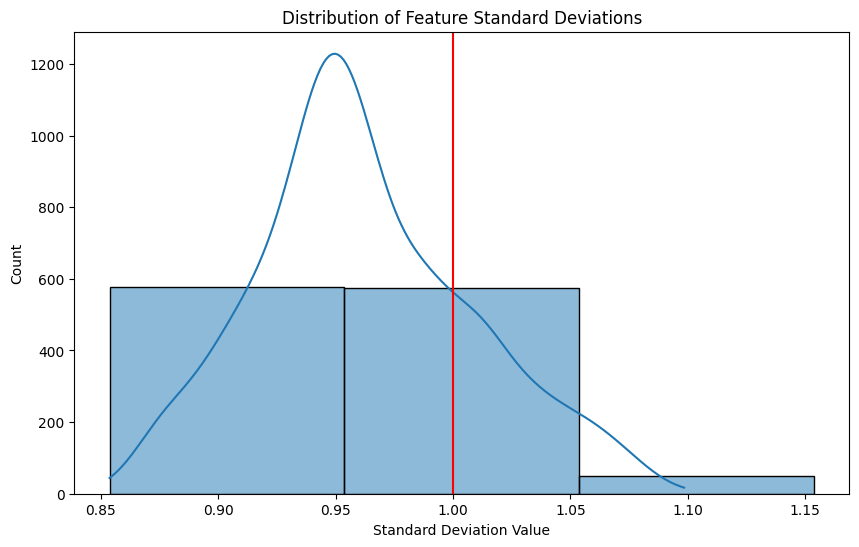

In [ ]:
# standard deviation check
plt.figure(figsize=(10,6))
sns.histplot(feature_stds, kde=True, binwidth=0.1)
plt.axvline(1, color='red') # Since you expect standardized data to have std of 1
plt.title('Distribution of Feature Standard Deviations')
plt.xlabel('Standard Deviation Value')
plt.show()


In [ ]:
# null check

null_values = train_data.isnull().sum().sum()
print(null_values)


0


# Below 4 Models (Model 1, 2, 3 and 4) were trained on imbalanced class.
# Model 5 onwards are checked with balanced class.

# Model 1: Basic fully connected model

## Bitgrit score: 0.77496274

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# model

model = Sequential()
model.add(Dense(1024, input_dim=1200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1229824   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,755,137
Trainable params: 1,755,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict
y_pred = model.predict(X_val)

# values >=0.5 as 1 else 0
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_val, y_pred)
print(f"Validation F1 Score: {f1}")

Epoch 1/20
132/132 [==============================] - 6s 6ms/step - loss: 0.4513 - accuracy: 0.7998 - val_loss: 0.3066 - val_accuracy: 0.8714
Epoch 2/20
132/132 [==============================] - 1s 4ms/step - loss: 0.2107 - accuracy: 0.9140 - val_loss: 0.3753 - val_accuracy: 0.8733
Epoch 3/20
132/132 [==============================] - 1s 4ms/step - loss: 0.1238 - accuracy: 0.9510 - val_loss: 0.4257 - val_accuracy: 0.8590
Epoch 4/20
33/33 [==============================] - 0s 2ms/step
Validation Accuracy: 0.8323809523809523
Validation F1 Score: 0.6535433070866141


In [ ]:
X_test = test_data.drop('id', axis=1)

# Predict
y_test_pred = model.predict(X_test)

y_test_pred = [1 if prob >= 0.5 else 0 for prob in y_test_pred]



71/71 [==============================] - 0s 2ms/step


In [ ]:
submission = pd.DataFrame({
    "id": test_data['id'],  # Ids of the test data
    "labels": y_test_pred
})

submission.to_csv('submission.csv', index=False)


# Model 2: CNN

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


In [ ]:

X_train = train_data.iloc[:,1:]
y_train = train_data['labels']


X_train = X_train.values.reshape(-1,20,20,3)

X_test = test_data.iloc[:,1:]
X_test = X_test.values.reshape(-1,20,20,3)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


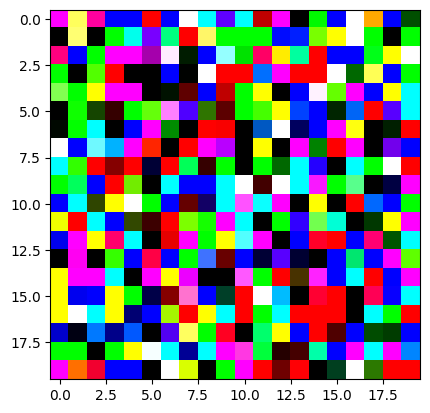

In [ ]:
import matplotlib.pyplot as plt


img = X_train[1]

plt.imshow(img)
plt.show()


In [ ]:
# # model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, mode ='min', restore_best_weights=True )

# # Train
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # prediction
# val_predictions = model.predict(X_val)

#
# val_predictions = [1 if x > 0.5 else 0 for x in val_predictions]

# # accuracy
# accuracy = accuracy_score(y_val, val_predictions)
# print("Validation Accuracy: ", accuracy)

# # F1 score
# f1 = f1_score(y_val, val_predictions)
# print("Validation F1 Score: ", f1)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(20, 20, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, mode ='min', restore_best_weights=True )

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

val_predictions = (model.predict(X_val) > 0.5).astype("int32")
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))
print("Validation F1 Score: ", f1_score(y_val, val_predictions))


Epoch 1/30
132/132 [==============================] - 7s 8ms/step - loss: 0.5136 - accuracy: 0.7502 - val_loss: 0.4130 - val_accuracy: 0.8286
Epoch 2/30
132/132 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.7933 - val_loss: 0.4279 - val_accuracy: 0.8114
Epoch 3/30
132/132 [==============================] - 1s 5ms/step - loss: 0.3822 - accuracy: 0.8207 - val_loss: 0.3594 - val_accuracy: 0.8419
Epoch 4/30
132/132 [==============================] - 1s 5ms/step - loss: 0.3641 - accuracy: 0.8262 - val_loss: 0.3388 - val_accuracy: 0.8467
Epoch 5/30
132/132 [==============================] - 1s 5ms/step - loss: 0.3493 - accuracy: 0.8324 - val_loss: 0.3588 - val_accuracy: 0.8419
Epoch 6/30
132/132 [==============================] - 1s 5ms/step - loss: 0.3350 - accuracy: 0.8476 - val_loss: 0.3500 - val_accuracy: 0.8486
Epoch 7/30
132/132 [==============================] - 1s 6ms/step - loss: 0.3203 - accuracy: 0.8476 - val_loss: 0.3304 - val_accuracy: 0.8448
Epoch 

# Model 3: CNN with data augmentation

In [ ]:
X_train = train_data.iloc[:,1:]
y_train = train_data['labels']


X_train = X_train.values.reshape(-1,20,20,3)

X_test = test_data.iloc[:,1:]
X_test = X_test.values.reshape(-1,20,20,3)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Epoch 1/100
131/131 [==============================] - 4s 18ms/step - loss: 0.5882 - accuracy: 0.7245 - val_loss: 0.5398 - val_accuracy: 0.7438
Epoch 2/100
131/131 [==============================] - 3s 20ms/step - loss: 0.5389 - accuracy: 0.7336 - val_loss: 0.4730 - val_accuracy: 0.7486
Epoch 3/100
131/131 [==============================] - 3s 23ms/step - loss: 0.5108 - accuracy: 0.7424 - val_loss: 0.4673 - val_accuracy: 0.7714
Epoch 4/100
131/131 [==============================] - 3s 24ms/step - loss: 0.4979 - accuracy: 0.7414 - val_loss: 0.4934 - val_accuracy: 0.7781
Epoch 5/100
131/131 [==============================] - 2s 16ms/step - loss: 0.4869 - accuracy: 0.7486 - val_loss: 0.4711 - val_accuracy: 0.8038
Epoch 6/100
131/131 [==============================] - 2s 16ms/step - loss: 0.4782 - accuracy: 0.7552 - val_loss: 0.4832 - val_accuracy: 0.7905
Epoch 7/100
131/131 [==============================] - 3s 23ms/step - loss: 0.4750 - accuracy: 0.7571 - val_loss: 0.4629 - val_accuracy:

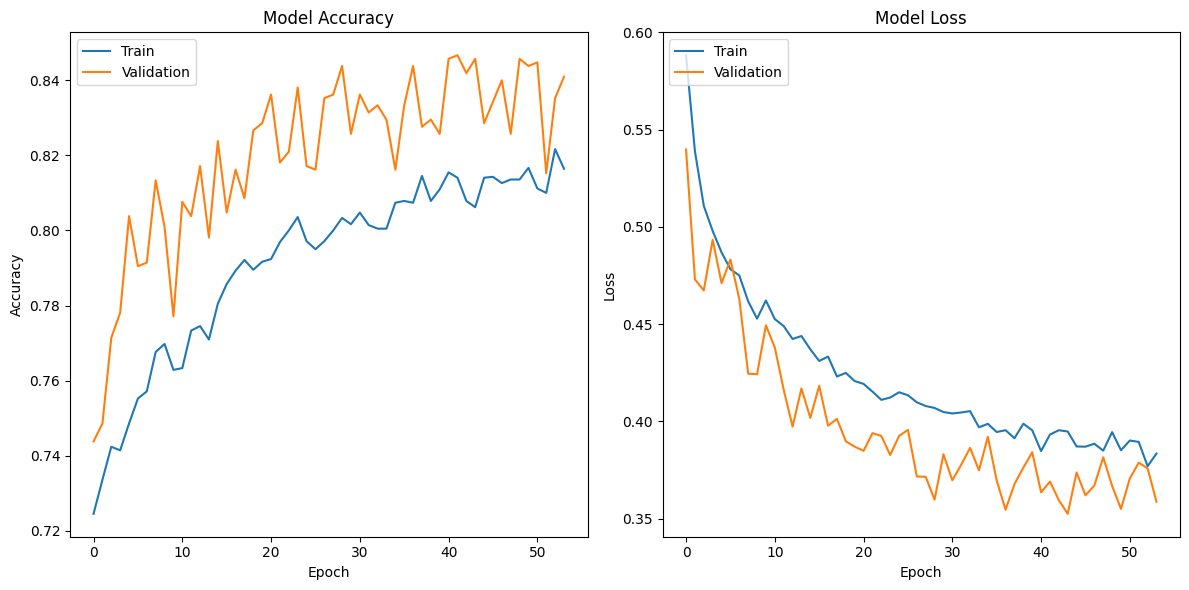

33/33 [==============================] - 0s 2ms/step
Validation Accuracy:  0.8457142857142858
Validation F1 Score:  0.599009900990099


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(20, 20, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, mode ='min', restore_best_weights=True )



history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

val_predictions = (model.predict(X_val) > 0.5).astype("int32")
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))
print("Validation F1 Score: ", f1_score(y_val, val_predictions))


In [ ]:
# Predict
y_test_pred = model.predict(X_test)

# >=0.5 as 1 else 0
y_test_pred = [1 if prob >= 0.5 else 0 for prob in y_test_pred]


# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": y_test_pred
})


submission.to_csv('submission.csv', index=False)

71/71 [==============================] - 0s 2ms/step


# Model 4: Transformer  (score dropped !!)

## Britgrit score: 0.64939551

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score
import tensorflow_addons as tfa

In [ ]:
class PositionalEncoding(layers.Layer):
    def __init__(self):
        super(PositionalEncoding, self).__init__()

    def call(self, inputs):
        seq_length = inputs.shape[-2]
        d_model = inputs.shape[-1]
        pos = tf.range(seq_length, dtype=tf.float32)[:, tf.newaxis]
        i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
        denom = tf.exp(i * -(tf.math.log(10000.0) / d_model))

        pos_encoding = pos * denom
        pos_encoding_sin = tf.math.sin(pos_encoding)
        pos_encoding_cos = tf.math.cos(pos_encoding)

        pos_encoding_sin_masked = tf.where(tf.range(d_model) % 2 == 0, pos_encoding_sin, 0.)
        pos_encoding_cos_masked = tf.where(tf.range(d_model) % 2 == 1, pos_encoding_cos, 0.)

        pos_encoding = pos_encoding_sin_masked + pos_encoding_cos_masked

        return inputs + pos_encoding[tf.newaxis, ...]







def transformer_block(embed_dim, num_heads, ff_dim, rate=0.1):
    inputs = layers.Input(shape=(None, embed_dim))
    attn_output = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=embed_dim, dropout=rate)(inputs, inputs)
    attn_output = layers.Dropout(rate)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    ffn_output = layers.Dense(ff_dim, activation="relu")(out1)
    ffn_output = layers.Dense(embed_dim)(ffn_output)
    ffn_output = layers.Dropout(rate)(ffn_output)
    return tf.keras.Model(inputs=inputs, outputs=layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output))

def build_model(num_layers, embed_dim, num_heads, ff_dim, input_shape, num_classes, rate=0.1):
    inputs = layers.Input(shape=input_shape)
    embedding_layer = layers.Embedding(input_dim=1200, output_dim=embed_dim)
    x = embedding_layer(inputs)
    x = PositionalEncoding()(x)
    for _ in range(num_layers):
        x = transformer_block(embed_dim, num_heads, ff_dim, rate)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(rate)(x)
    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(rate)(x)


    outputs = layers.Dense(1, activation="sigmoid")(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)


# Hyperparameters
NUM_LAYERS = 2
EMBED_DIM = 32
NUM_HEADS = 2
FF_DIM = 32
INPUT_SHAPE = (1200,)

# model
model = build_model(NUM_LAYERS, EMBED_DIM, NUM_HEADS, FF_DIM, INPUT_SHAPE, 1)



# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', tfa.metrics.F1Score(num_classes=2, average='micro', threshold=0.5)]
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
y_train = np.ravel(y_train)


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# accuracy and F1 score
final_accuracy = history.history['val_accuracy'][-1]
final_f1_score = history.history['val_f1_score'][-1]

print(f'Final Accuracy on validation data: {final_accuracy * 100:.2f}%')
print(f'Average Final F1 Score on validation data: {np.mean(final_f1_score):.2f}')

Epoch 1/100
132/132 [==============================] - 36s 155ms/step - loss: 0.5911 - accuracy: 0.7293 - f1_score: 0.0224 - val_loss: 0.5864 - val_accuracy: 0.7286 - val_f1_score: 0.0000e+00
Epoch 2/100
132/132 [==============================] - 20s 148ms/step - loss: 0.5823 - accuracy: 0.7345 - f1_score: 0.0000e+00 - val_loss: 0.5847 - val_accuracy: 0.7286 - val_f1_score: 0.0000e+00
Epoch 3/100
132/132 [==============================] - 20s 150ms/step - loss: 0.5805 - accuracy: 0.7345 - f1_score: 0.0000e+00 - val_loss: 0.5752 - val_accuracy: 0.7286 - val_f1_score: 0.0000e+00
Epoch 4/100
132/132 [==============================] - 20s 150ms/step - loss: 0.5706 - accuracy: 0.7345 - f1_score: 0.0000e+00 - val_loss: 0.4768 - val_accuracy: 0.7286 - val_f1_score: 0.0000e+00
Epoch 5/100
132/132 [==============================] - 21s 157ms/step - loss: 0.5608 - accuracy: 0.7338 - f1_score: 0.0124 - val_loss: 0.4951 - val_accuracy: 0.7286 - val_f1_score: 0.0000e+00
Epoch 6/100
132/132 [=======

In [ ]:
model.save('VT_model1_try2.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('my_model.h5')

In [ ]:

X_test = test_data.iloc[:, 1:].values

# Predict
predictions = model.predict(X_test)


# values greater than or equal to 0.5 as 1 and less than 0.5 as 0
predictions = [1 if prob >= 0.5 else 0 for prob in predictions]

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_VT_model1_try2.csv', index=False)

71/71 [==============================] - 3s 44ms/step


# Balancing the imbalanced classes.

In [ ]:
X = train_data.drop('labels', axis=1)
y = train_data['labels']
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X, y)

In [ ]:
np.bincount(y_train_new)

array([3850, 3850])

# Model 5: KNN

## With balanced

In [ ]:
X = train_data.drop('labels', axis=1)
y = train_data['labels']
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train_new, y_train_new, test_size=0.2, random_state=42)


from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

y_val_pred = knn.predict(X_val_pca)

accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.7071428571428572
F1 Score: 0.7707168276563295


## Cheking with imbalanced data as well

In [ ]:
X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_val_pred = knn.predict(X_val)


accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.88
F1 Score: 0.72


# Model 6: Random forest

## Bitgrit score: 0.75250836

## With balanced classes

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_new, y_train_new, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1_rf}")


Random Forest Accuracy: 0.9409090909090909
Random Forest F1 Score: 0.9371112646855563


In [ ]:
X_test = test_data.iloc[:, 1:].values

# Predict
predictions = rf.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_rf_balanced.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## With imbalanced classes

In [ ]:
X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest Accuracy: 0.8580952380952381
Random Forest F1 Score: 0.6169665809768637


# Model 7: Transformer with balanced classes (no improvement)

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

# Oversampling using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def create_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=4, dropout=0.4)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(30, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs=inputs, outputs=outputs)

# model
model = create_model(input_shape=(1200,1))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reshape to fit the transformer model input
X_train_transformer = np.reshape(X_train.to_numpy(), (X_train.shape[0], X_train.shape[1], 1))
X_val_transformer = np.reshape(X_val.to_numpy(), (X_val.shape[0], X_val.shape[1], 1))

# Train
history = model.fit(X_train_transformer, y_train,
                    validation_data=(X_val_transformer, y_val),
                    epochs=50, batch_size=32,
                    callbacks=[early_stopping])


# Predict
y_val_pred = model.predict(X_val_transformer)

# Converting probabilities into class labels
y_val_pred = np.where(y_val_pred >= 0.5, 1, 0)

# Accuracy
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

# F1 Score
print("Validation F1 Score: ", f1_score(y_val, y_val_pred))



Epoch 1/50
193/193 [==============================] - 42s 152ms/step - loss: 0.6934 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 2/50
193/193 [==============================] - 29s 150ms/step - loss: 0.6932 - accuracy: 0.4878 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 3/50
193/193 [==============================] - 30s 156ms/step - loss: 0.6933 - accuracy: 0.4865 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 4/50
193/193 [==============================] - 30s 154ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4929
Epoch 5/50
193/193 [==============================] - 29s 152ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.4948
Epoch 6/50
193/193 [==============================] - 29s 152ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 7/50
193/193 [==============================] - 29s 151ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6930 - val_ac

# Model 8: Simple dense network wih class balanced
(Multiple attempts with different parameters)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.callbacks import EarlyStopping
import keras
from keras import backend as K
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()


model.add(Dense(256, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))


model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))


model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))


model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

# Train
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

# Evaluate
val_loss, val_acc, val_f1 = model.evaluate(X_val, y_val, verbose=0)

print(f"Final accuracy on validation set: {val_acc*100:.2f}%")
print(f"Final F1 score on validation set: {val_f1:.2f}")


Epoch 1/100
193/193 [==============================] - 5s 10ms/step - loss: 4.6010 - accuracy: 0.7698 - f1_score: 0.7639 - val_loss: 2.5586 - val_accuracy: 0.8539 - val_f1_score: 0.8558 - lr: 0.0010
Epoch 2/100
193/193 [==============================] - 1s 7ms/step - loss: 1.7093 - accuracy: 0.8369 - f1_score: 0.8342 - val_loss: 1.0788 - val_accuracy: 0.8494 - val_f1_score: 0.8533 - lr: 0.0011
Epoch 3/100
193/193 [==============================] - 1s 7ms/step - loss: 0.9020 - accuracy: 0.8485 - f1_score: 0.8445 - val_loss: 0.7330 - val_accuracy: 0.8662 - val_f1_score: 0.8643 - lr: 0.0013
Epoch 4/100
193/193 [==============================] - 1s 7ms/step - loss: 0.7269 - accuracy: 0.8448 - f1_score: 0.8419 - val_loss: 0.6832 - val_accuracy: 0.8526 - val_f1_score: 0.8502 - lr: 0.0014
Epoch 5/100
193/193 [==============================] - 1s 7ms/step - loss: 0.7178 - accuracy: 0.8383 - f1_score: 0.8340 - val_loss: 0.6929 - val_accuracy: 0.8552 - val_f1_score: 0.8532 - lr: 0.0016
Epoch 6/1

In [ ]:
model.save('MLP_Balanced_1.h5')

In [ ]:
from tensorflow.keras.models import load_model

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model = load_model('MLP_Balanced_1.h5', custom_objects={'f1_score': f1_score})

X_test = test_data.iloc[:, 1:].values

# Predict
predictions = model.predict(X_test)


predictions = [1 if prob >= 0.5 else 0 for prob in predictions]

# Submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_MLP_Balanced_1.csv', index=False)

71/71 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values


# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#  k-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = []

# train loop
for train, test in kfold.split(X, y):
    #  model
    input_layer = Input(shape=(1200,))
    x = Dense(256, kernel_regularizer=regularizers.l2(0.01))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    x = Dense(128, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    x = Dense(64, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    output_layer = Dense(1, activation='sigmoid')(x)

    # Build
    model = Model(input_layer, output_layer)

    # Compile
    opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # learning rate reduction
    lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                     patience=3,
                                     verbose=1,
                                     factor=0.5,
                                     min_lr=0.00001)

    # Train
    history = model.fit(X[train], y[train], epochs=100, batch_size=32, verbose=1,
                        callbacks=[early_stopping, lr_reduction],
                        validation_data=(X[test], y[test]))

    # Evaluate
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f"Accuracy on validation set: {scores[1]*100:.2f}%")

    cv_scores.append(scores[1] * 100)

print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")


Epoch 1/100
132/132 [==============================] - 7s 18ms/step - loss: 5.5949 - accuracy: 0.7226 - val_loss: 3.9103 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/100
132/132 [==============================] - 1s 10ms/step - loss: 3.0185 - accuracy: 0.8105 - val_loss: 2.2181 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 3/100
132/132 [==============================] - 1s 10ms/step - loss: 1.8017 - accuracy: 0.8390 - val_loss: 1.4686 - val_accuracy: 0.8219 - lr: 0.0010
Epoch 4/100
132/132 [==============================] - 1s 8ms/step - loss: 1.2274 - accuracy: 0.8571 - val_loss: 1.1015 - val_accuracy: 0.8238 - lr: 0.0010
Epoch 5/100
132/132 [==============================] - 1s 7ms/step - loss: 0.9354 - accuracy: 0.8593 - val_loss: 0.9200 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 6/100
132/132 [==============================] - 1s 7ms/step - loss: 0.8111 - accuracy: 0.8543 - val_loss: 0.8136 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 7/100
132/132 [==============================] - 1s 7ms

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers, backend as K

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# k-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []

# Loop
# for train, test in kfold.split(X, y):
#     # Define the model architecture
#     input_layer = Input(shape=(1200,))
#     x = Dense(256, kernel_regularizer=regularizers.l2(0.01))(input_layer)
#     x = BatchNormalization()(x)
#     x = Dropout(0.6)(x)
#     x = Activation('elu')(x)

#     x = Dense(128, kernel_regularizer=regularizers.l2(0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.6)(x)
#     x = Activation('elu')(x)

#     x = Dense(64, kernel_regularizer=regularizers.l2(0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.6)(x)
#     x = Activation('elu')(x)

#     output_layer = Dense(1, activation='sigmoid')(x)


for train, test in kfold.split(X, y):
    # model
    input_layer = Input(shape=(1200,))
    x = Dense(512, kernel_regularizer=regularizers.l2(0.01))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    x = Dense(256, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    x = Dense(128, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    x = Dense(64, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)
    x = Activation('elu')(x)

    output_layer = Dense(1, activation='sigmoid')(x)
    # Build
    model = Model(input_layer, output_layer)

    # Compile
    opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

    # early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # learning rate reduction
    lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                     patience=3,
                                     verbose=1,
                                     factor=0.5,
                                     min_lr=0.00001)

    # Train
    history = model.fit(X[train], y[train], epochs=100, batch_size=32, verbose=1,
                        callbacks=[early_stopping, lr_reduction],
                        validation_data=(X[test], y[test]))

    # Evaluate
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f"Accuracy on validation set: {scores[1]*100:.2f}%")

    cv_scores.append(scores[1] * 100)

    # validation accuracy and F1 score for each epoch
    for i in range(len(history.history['val_accuracy'])):
      print(f"Epoch {i+1}: Validation Accuracy: {history.history['val_accuracy'][i]*100:.2f}%, F1 Score: {history.history['val_f1_score'][i]*100:.2f}%")

print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")



Epoch 1/100
132/132 [==============================] - 8s 13ms/step - loss: 10.2517 - accuracy: 0.6950 - f1_score: 0.5162 - val_loss: 6.8762 - val_accuracy: 0.7952 - val_f1_score: 0.6957 - lr: 0.0010
Epoch 2/100
132/132 [==============================] - 1s 8ms/step - loss: 5.0618 - accuracy: 0.8119 - f1_score: 0.6141 - val_loss: 3.4525 - val_accuracy: 0.8533 - val_f1_score: 0.6067 - lr: 0.0010
Epoch 3/100
132/132 [==============================] - 1s 8ms/step - loss: 2.6966 - accuracy: 0.8429 - f1_score: 0.6733 - val_loss: 2.0263 - val_accuracy: 0.8448 - val_f1_score: 0.5809 - lr: 0.0010
Epoch 4/100
132/132 [==============================] - 1s 8ms/step - loss: 1.6875 - accuracy: 0.8529 - f1_score: 0.7041 - val_loss: 1.4089 - val_accuracy: 0.8486 - val_f1_score: 0.5787 - lr: 0.0010
Epoch 5/100
132/132 [==============================] - 1s 8ms/step - loss: 1.2626 - accuracy: 0.8483 - f1_score: 0.6873 - val_loss: 1.1247 - val_accuracy: 0.8257 - val_f1_score: 0.6200 - lr: 0.0010
Epoch 6/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.callbacks import EarlyStopping
import keras
from keras import backend as K
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()

model.add(Dense(256, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Activation('elu'))

model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

# Train
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

# Evaluate
val_loss, val_acc, val_f1 = model.evaluate(X_val, y_val, verbose=0)

print(f"Final accuracy on validation set: {val_acc*100:.2f}%")
print(f"Final F1 score on validation set: {val_f1:.2f}")


Epoch 1/100
49/49 [==============================] - 2s 13ms/step - loss: 5.5787 - accuracy: 0.7451 - f1_score: 0.7523 - val_loss: 4.0466 - val_accuracy: 0.8474 - val_f1_score: 0.8389 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 0s 8ms/step - loss: 3.0961 - accuracy: 0.8419 - f1_score: 0.8417 - val_loss: 2.2440 - val_accuracy: 0.8558 - val_f1_score: 0.8502 - lr: 0.0011
Epoch 3/100
49/49 [==============================] - 0s 8ms/step - loss: 1.7128 - accuracy: 0.8651 - f1_score: 0.8682 - val_loss: 1.3213 - val_accuracy: 0.8513 - val_f1_score: 0.8462 - lr: 0.0013
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 1.0307 - accuracy: 0.8909 - f1_score: 0.8924 - val_loss: 0.9159 - val_accuracy: 0.8526 - val_f1_score: 0.8735 - lr: 0.0014
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.7622 - accuracy: 0.8955 - f1_score: 0.8915 - val_loss: 0.8062 - val_accuracy: 0.8227 - val_f1_score: 0.8466 - lr: 0.0016
Epoch 6/100
49/49

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.callbacks import EarlyStopping
import keras
from keras import backend as K
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()

model.add(Dense(64, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

# Train
model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

# Evaluate
val_loss, val_acc, val_f1 = model.evaluate(X_val, y_val, verbose=0)

print(f"Final accuracy on validation set: {val_acc*100:.2f}%")
print(f"Final F1 score on validation set: {val_f1:.2f}")


Epoch 1/100
42/42 [==============================] - 2s 17ms/step - loss: 2.6314 - accuracy: 0.5959 - f1_score: 0.6228 - val_loss: 2.0775 - val_accuracy: 0.7870 - val_f1_score: 0.7588 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 9ms/step - loss: 2.0736 - accuracy: 0.6627 - f1_score: 0.6662 - val_loss: 1.6851 - val_accuracy: 0.8149 - val_f1_score: 0.7920 - lr: 0.0011
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 1.6291 - accuracy: 0.7131 - f1_score: 0.6977 - val_loss: 1.2829 - val_accuracy: 0.8416 - val_f1_score: 0.8207 - lr: 0.0013
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 1.2127 - accuracy: 0.7711 - f1_score: 0.7646 - val_loss: 0.9268 - val_accuracy: 0.8610 - val_f1_score: 0.8480 - lr: 0.0014
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.8854 - accuracy: 0.8258 - f1_score: 0.8133 - val_loss: 0.6853 - val_accuracy: 0.8831 - val_f1_score: 0.8747 - lr: 0.0016
Epoch 6/100
42/42 [

In [ ]:
X_test = test_data.iloc[:, 1:].values

predictions = model.predict(X_test)

predictions = [1 if prob >= 0.5 else 0 for prob in predictions]

#submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_MLP_Balanced_2.csv', index=False)

71/71 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.callbacks import EarlyStopping
import keras
from keras import backend as K
from imblearn.over_sampling import SMOTE


X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Bootstrapping  i.e Increase size of the dataset
X_train_boot, y_train_boot = resample(X_train, y_train, replace=True, n_samples=len(X_train)*2, random_state=123)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()

model.add(Dense(64, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

# Train
model.fit(X_train_boot, y_train_boot, epochs=100, batch_size=150, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

# Evaluate
val_loss, val_acc, val_f1 = model.evaluate(X_val, y_val, verbose=0)

print(f"Final accuracy on validation set: {val_acc*100:.2f}%")
print(f"Final F1 score on validation set: {val_f1:.2f}")


Epoch 1/100
83/83 [==============================] - 2s 12ms/step - loss: 2.3376 - accuracy: 0.5976 - f1_score: 0.6412 - val_loss: 1.7648 - val_accuracy: 0.7753 - val_f1_score: 0.7481 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 1s 9ms/step - loss: 1.4364 - accuracy: 0.7093 - f1_score: 0.6999 - val_loss: 0.9511 - val_accuracy: 0.8383 - val_f1_score: 0.8139 - lr: 0.0011
Epoch 3/100
83/83 [==============================] - 1s 8ms/step - loss: 0.8066 - accuracy: 0.8463 - f1_score: 0.8394 - val_loss: 0.5924 - val_accuracy: 0.8721 - val_f1_score: 0.8723 - lr: 0.0013
Epoch 4/100
83/83 [==============================] - 1s 8ms/step - loss: 0.5229 - accuracy: 0.9131 - f1_score: 0.9112 - val_loss: 0.4800 - val_accuracy: 0.8916 - val_f1_score: 0.8907 - lr: 0.0014
Epoch 5/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4331 - accuracy: 0.9343 - f1_score: 0.9327 - val_loss: 0.4718 - val_accuracy: 0.8877 - val_f1_score: 0.8840 - lr: 0.0016
Epoch 6/100
83/83 [

# Model 9: Ensemble of MLP and XGBoost  (progress!! finally ray of hope)

## Bitgrit score: 0.87719298

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Bootstrapping
X_train_boot, y_train_boot = resample(X_train, y_train, replace=True, n_samples=len(X_train)*2, random_state=123)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()

model.add(Dense(64, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = RMSprop(learning_rate=0.0001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

model.fit(X_train_boot, y_train_boot, epochs=100, batch_size=150, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

from sklearn.metrics import f1_score

# Train
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_boot, y_train_boot)

# predict
predictions_dl = model.predict(X_val)
predictions_xgb = model_xgb.predict_proba(X_val)[:, 1].reshape(-1,1)

# average of the two model predictions
predictions_ensemble = np.mean([predictions_dl, predictions_xgb], axis=0)

# predictions as binary labels
predictions_ensemble = (predictions_ensemble >= 0.5).astype(int)

# accuracy and F1 score
accuracy = accuracy_score(y_val, predictions_ensemble)
f1 = f1_score(y_val, predictions_ensemble)

print(f"Accuracy of the ensemble model on validation set: {accuracy*100:.2f}%")
print(f"F1 Score of the ensemble model on validation set: {f1:.2f}")

Epoch 1/100
83/83 [==============================] - 2s 8ms/step - loss: 2.1377 - accuracy: 0.6386 - f1_score: 0.5999 - val_loss: 1.5542 - val_accuracy: 0.8442 - val_f1_score: 0.8468 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 1s 7ms/step - loss: 1.2765 - accuracy: 0.7722 - f1_score: 0.7728 - val_loss: 0.8756 - val_accuracy: 0.8669 - val_f1_score: 0.8686 - lr: 0.0011
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 0.7479 - accuracy: 0.8709 - f1_score: 0.8728 - val_loss: 0.5826 - val_accuracy: 0.8792 - val_f1_score: 0.8769 - lr: 0.0013
Epoch 4/100
83/83 [==============================] - 1s 8ms/step - loss: 0.5124 - accuracy: 0.9212 - f1_score: 0.9205 - val_loss: 0.4978 - val_accuracy: 0.8877 - val_f1_score: 0.8919 - lr: 0.0014
Epoch 5/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4364 - accuracy: 0.9364 - f1_score: 0.9362 - val_loss: 0.4774 - val_accuracy: 0.8773 - val_f1_score: 0.8822 - lr: 0.0016
Epoch 6/100
83/83 [=

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


49/49 [==============================] - 0s 2ms/step
Accuracy of the ensemble model on validation set: 92.79%
F1 Score of the ensemble model on validation set: 0.93


In [ ]:
# # Save model
# model.save('deep_learning_model.h5')

# # Save the XGBoost model
# import pickle
# pickle.dump(model_xgb, open("xgboost_model.pickle.dat", "wb"))


# # Load the model
# from keras.models import load_model
# loaded_model_dl = load_model('deep_learning_model.h5', custom_objects={'f1_score': f1_score})

# # Load the XGBoost model
# loaded_model_xgb = pickle.load(open("xgboost_model.pickle.dat", "rb"))


# # Predict
# predictions_dl = loaded_model_dl.predict(X_test)
# predictions_xgb = loaded_model_xgb.predict_proba(X_test)[:, 1].reshape(-1,1)

# # average
# predictions_ensemble = np.mean([predictions_dl, predictions_xgb], axis=0)

# #  predictions as binary labels
# predictions_ensemble = (predictions_ensemble >= 0.5).astype(int)


In [ ]:
X_test = test_data.iloc[:, 1:].values

# Predict
predictions_dl = model.predict(X_test)
predictions_xgb = model_xgb.predict_proba(X_test)[:, 1].reshape(-1,1)


predictions_ensemble = np.mean([predictions_dl, predictions_xgb], axis=0)

predictions_ensemble = (predictions_ensemble.flatten() >= 0.5).astype(int)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions_ensemble
})


submission.to_csv('submission_ensemble.csv', index=False)


71/71 [==============================] - 0s 3ms/step


# Mode 10: Only XGBoost


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score
# from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE


# X = train_data.drop(columns=['labels'])
# y = train_data['labels']


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # imbalance
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# model = XGBClassifier(use_label_encoder=False, objective='binary:hinge')

# # train
# model.fit(X_train_smote, y_train_smote)

# # predict
# y_pred = model.predict(X_val)

# # evaluate
# accuracy = accuracy_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# print(f"Validation Accuracy: {accuracy * 100:.2f}%")
# print(f"Validation F1 Score: {f1:.2f}")


# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score
# from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE


# X = train_data.drop(columns=['labels'])
# y = train_data['labels']


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # imbalance
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'n_estimators': [100, 200, 500],
#     'gamma': [0, 0.1, 0.2],
#     'min_child_weight': [1, 5, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=3, verbose=3, n_jobs=-1)
# grid.fit(X_train_smote, y_train_smote)

# # best parameters
# best_params = grid.best_params_

# print(f"Best parameters: {best_params}")

# # train
# model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
# model.fit(X_train_smote, y_train_smote)

# #  predict
# y_pred = model.predict(X_val)

# # evaluate
# accuracy = accuracy_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# print(f"Validation Accuracy: {accuracy * 100:.2f}%")
# print(f"Validation F1 Score: {f1:.2f}")






import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X = train_data.drop(columns=['labels'])
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# parameter grid for XGBClassifier
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist'),
                    param_grid, cv=3, verbose=3, n_jobs=1)
grid.fit(X_train_smote, y_train_smote)

# best parameters
best_params = grid.best_params_

print(f"Best parameters: {best_params}")

# train
model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist')
model.fit(X_train_smote, y_train_smote)

#  predict
y_pred = model.predict(X_val)

# evaluate
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation F1 Score: {f1:.2f}")

# Last output:
# Validation Accuracy: 87.62%
# Validation F1 Score: 0.73


# Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
# Validation Accuracy: 88.76%
# Validation F1 Score: 0.75

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.888 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.934 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.889 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.931 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.887 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.888 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.943 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.943 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.893 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.929 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.883 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.888 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.882 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.949 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.932 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.882 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.885 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.941 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.956 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.889 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.953 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.893 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.962 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.897 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.960 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.887 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.930 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.950 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.883 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.887 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.955 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.884 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.883 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.955 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.963 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.882 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.951 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.960 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.898 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.959 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.897 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.894 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.966 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.896 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.954 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.886 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.942 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.952 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.893 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.941 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.950 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.885 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.950 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.886 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.965 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.883 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.883 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.951 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.962 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.883 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.965 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.947 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.950 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.889 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.958 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.876 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.892 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.949 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.961 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.934 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.951 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.878 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.949 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.876 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.950 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.874 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.881 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.946 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.954 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.962 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.883 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.945 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.961 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.894 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.951 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.957 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.885 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.888 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.878 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.888 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.961 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.874 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.966 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.871 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.937 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.950 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.871 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.942 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.966 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.895 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.960 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.884 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.948 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.967 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.953 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.967 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.886 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.951 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.879 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.949 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.883 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.949 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.960 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.877 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.882 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.958 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.944 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.939 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.952 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.879 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.950 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.944 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.960 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.880 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.938 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.960 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.886 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.876 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.946 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.943 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.960 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.934 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.880 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.940 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.868 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.941 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.952 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.942 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.880 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.947 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.889 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.941 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.963 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.879 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.959 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.881 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.946 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.966 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.937 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.961 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.878 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.962 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.870 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.938 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.963 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.942 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.965 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.939 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.874 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.944 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.939 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.879 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.939 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.960 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.940 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.888 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.966 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.882 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.876 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.960 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.880 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.946 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.956 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.873 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.942 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.967 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.937 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.865 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.941 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.939 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.940 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.890 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.931 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.941 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.890 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.880 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.936 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.892 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.881 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.954 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.891 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.943 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.960 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.891 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.945 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.933 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.943 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.887 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.893 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.936 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.895 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.935 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.951 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.895 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.969 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.896 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.889 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.940 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.883 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.944 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.885 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.959 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.950 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.959 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.892 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.895 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.939 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.953 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.890 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.970 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.893 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.955 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.893 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.948 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.894 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.943 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.958 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.883 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.956 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.963 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.895 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.884 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.888 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.941 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.964 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.881 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.953 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.960 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.883 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.951 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.893 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.955 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.889 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.961 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.878 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.958 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.937 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.949 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.876 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.885 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.871 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.951 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.876 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.940 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.954 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.953 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.949 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.960 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.887 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.965 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.892 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.954 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.876 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.951 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.879 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.965 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.871 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.954 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.965 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.891 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.958 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.888 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.965 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.949 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.952 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.879 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.879 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.878 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.876 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.953 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.881 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.945 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.959 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.886 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.940 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.943 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.884 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.943 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.961 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.952 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.953 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.940 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.940 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.956 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.955 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.888 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.962 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.879 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.952 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.960 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.872 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.943 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.879 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.941 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.967 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.945 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.959 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.943 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.871 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.941 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.883 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.943 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.880 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.949 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.887 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.938 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.961 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.881 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.884 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.969 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.872 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.961 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.959 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.869 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.935 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.964 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.877 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.958 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.873 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.937 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.950 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.943 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.952 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.932 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.930 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.885 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.945 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.953 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.934 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.898 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.930 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.944 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.882 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.890 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.884 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.939 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.884 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.934 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.941 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.879 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.947 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.883 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.943 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.953 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.887 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.938 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.893 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.938 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.953 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.891 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.955 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.889 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.966 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.884 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.938 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.890 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.941 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.880 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.956 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.889 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.942 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.950 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.952 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.945 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.952 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.899 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.942 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.891 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.956 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.965 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.895 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.951 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.886 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.945 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.949 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.896 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.954 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.883 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.949 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.960 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.892 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.952 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.881 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.886 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.953 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.876 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.966 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.881 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.948 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.965 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.889 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.955 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.889 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.886 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.939 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.959 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.881 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.938 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.953 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.943 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.966 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.881 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.876 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.946 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.950 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.951 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.879 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.961 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.891 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.962 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.888 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.959 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.889 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.967 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.886 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.953 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.877 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.945 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.958 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.874 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.935 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.950 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.868 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.964 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.942 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.889 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.960 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.889 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.958 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.882 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.970 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.887 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.883 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.880 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.956 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.883 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.881 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.950 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.961 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.873 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.952 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.882 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.941 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.952 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.880 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.945 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.959 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.882 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.951 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.888 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.937 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.878 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.883 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.955 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.932 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.951 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.874 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.939 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.953 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.871 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.943 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.940 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.883 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.957 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.876 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.962 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.887 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.870 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.878 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.961 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.871 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.946 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.965 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.874 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.942 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.874 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.932 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.873 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.939 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.879 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.884 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.943 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.953 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.879 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.948 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.879 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.943 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.956 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.876 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.941 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.876 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.952 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.868 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.955 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.937 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.950 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.937 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.947 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.893 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.890 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.935 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.880 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.933 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.889 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.955 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.888 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.884 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.929 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.885 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.931 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.880 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.941 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.951 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.897 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.959 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.894 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.935 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.950 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.897 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.956 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.964 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.893 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.946 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.963 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.884 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.942 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.898 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.887 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.967 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.890 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.877 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.886 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.936 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.879 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.944 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.884 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.962 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.897 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.940 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.960 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.894 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.935 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.947 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.893 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.956 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.968 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.949 total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.891 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.943 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.956 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.885 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.941 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.950 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.888 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.965 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.947 total time=   8.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.939 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.887 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.956 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.876 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.967 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.886 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.949 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.881 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.939 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.952 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.892 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.946 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.891 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.947 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.889 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.956 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.945 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.887 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.953 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.888 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.880 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.880 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.949 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.879 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.895 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.939 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.890 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.898 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.881 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.880 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.886 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.959 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.958 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.947 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.949 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.891 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.951 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.962 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.947 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.951 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.888 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.954 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.968 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.888 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.955 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.877 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.884 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.955 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.874 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.949 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.954 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.963 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.962 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.876 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.965 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.951 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.952 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.881 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.950 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.955 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.960 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.869 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.945 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.877 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.939 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.965 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.877 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.952 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.878 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.944 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.882 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.886 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.943 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.953 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.885 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.945 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.964 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.946 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.960 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.886 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.943 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.944 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.956 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.884 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.963 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.869 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.953 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.884 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.963 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.890 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.957 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.961 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.886 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.945 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.960 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.878 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.949 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.874 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.956 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.877 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.859 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.945 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.868 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.953 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.932 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.894 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.937 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.945 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.884 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.949 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.935 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.933 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.885 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.882 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.931 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.887 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.933 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.949 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.886 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.956 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.896 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.938 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.892 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.940 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.954 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.899 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.950 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.959 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.890 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.894 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.896 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.935 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.890 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.889 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.946 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.966 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.886 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.886 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.936 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.948 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.883 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.947 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.966 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.883 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.948 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.892 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.960 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.894 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.941 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.952 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.891 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.957 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.968 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.892 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.886 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.943 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.960 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.945 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.954 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.884 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.950 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.967 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.886 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.953 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.963 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.955 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.881 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.938 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.962 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.951 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.961 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.882 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.952 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.951 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.964 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.884 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.963 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.878 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.936 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.950 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.884 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.951 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.879 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.888 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.950 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.960 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.950 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.952 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.955 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.966 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.886 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.875 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.883 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.946 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.960 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.874 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.886 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.940 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.954 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.871 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.880 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.946 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.897 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.953 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.964 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.890 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.944 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.958 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.888 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.955 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.972 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.890 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.968 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.880 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.956 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.943 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.962 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.874 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.953 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.884 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.968 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.947 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.957 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.877 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.947 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.876 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.949 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.964 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.887 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.947 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.883 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.939 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.956 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.883 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.871 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.879 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.954 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.873 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.941 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.872 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.949 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.960 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.952 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.877 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.871 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.940 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.956 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.943 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.879 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.888 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.946 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.956 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.882 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.950 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.964 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.950 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.961 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.947 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.887 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.959 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.876 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.948 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.957 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.883 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.938 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.869 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.948 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.962 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.958 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.871 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.886 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.946 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.881 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.946 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.957 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.881 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.953 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.874 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.876 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.944 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.961 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.881 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.960 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.871 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.946 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.879 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.952 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.863 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.870 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.941 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.868 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.937 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.933 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.937 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.887 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.950 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.957 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.897 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.949 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.882 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.938 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.934 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.942 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.885 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.891 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.955 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.885 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.935 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.946 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.885 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.927 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.939 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.883 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.954 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.886 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.945 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.954 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.892 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.942 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.953 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.943 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.893 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.967 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.891 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.953 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.960 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.890 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.941 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.952 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.938 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.886 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.959 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.888 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.949 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.961 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.878 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.951 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.887 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.935 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.881 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.963 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.881 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.946 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.895 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.940 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.956 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.900 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.935 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.894 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.952 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.969 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.898 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.954 total time=   9.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.964 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.896 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.944 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.886 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.935 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.952 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.890 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.954 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.966 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.881 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.961 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.876 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.883 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.941 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.952 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.874 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.950 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.963 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.960 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.888 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.896 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.950 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.883 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.954 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.889 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.954 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.943 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.958 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.886 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.951 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.881 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.950 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.965 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.878 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.961 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.882 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.937 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.957 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.873 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.957 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.873 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.963 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.962 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.887 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.948 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.885 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.951 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.970 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.962 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.876 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.885 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.938 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.871 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.954 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.881 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.944 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.961 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.956 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.878 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.937 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.957 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.873 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.942 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.961 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.887 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.945 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.953 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.947 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.960 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.882 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.949 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.963 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.887 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.952 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.965 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.884 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.950 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.889 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.947 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.958 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.881 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.952 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.882 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.953 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.873 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.939 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.960 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.877 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.958 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.948 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.960 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.873 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.951 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.962 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.890 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.948 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.885 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.943 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.949 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.888 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.947 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.960 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.879 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.876 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.946 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.888 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.946 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.881 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.947 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.961 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.885 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.950 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.882 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.936 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.939 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.943 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.957 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.883 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.891 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.955 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.874 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.946 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.959 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.887 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.871 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.882 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.936 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.960 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.870 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.951 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.954 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.875 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.937 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.962 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.874 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.941 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.949 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.876 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.958 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.943 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.955 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.885 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.949 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.958 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.881 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.943 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.965 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.886 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.945 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.963 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.946 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.948 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.963 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.876 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.939 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8;, score=0.961 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.875 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.948 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=0.959 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.877 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.941 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8;, score=0.962 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.873 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.951 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=0.959 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.868 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.940 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.953 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.874 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.944 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.964 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.873 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.946 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.953 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.874 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.947 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/3] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.15, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.964 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Validation Accuracy: 88.76%
Validation F1 Score: 0.75


# Model 11: Ensembel using following   (Kernel dies...hope shattered)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_sample_weight
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

#  SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Bootstrapping
X_train_boot, y_train_boot = resample(X_train, y_train, replace=True, n_samples=len(X_train)*2, random_state=123)

# F1 Score custom metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# model
model = Sequential()

model.add(Dense(64, input_shape=(1200,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1, activation='sigmoid'))

# optimizer
opt = RMSprop(learning_rate=0.0001)

# Compile
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', f1_score])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))

model.fit(X_train_boot, y_train_boot, epochs=100, batch_size=150, verbose=1,
          callbacks=[early_stopping, lr_schedule], validation_data=(X_val, y_val))

from sklearn.metrics import f1_score

# Train
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_boot, y_train_boot)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#  predict
train_predictions_dl = model.predict(X_train)
train_predictions_xgb = model_xgb.predict_proba(X_train)[:, 1].reshape(-1,1)

# Stack
stacked_predictions = np.column_stack((train_predictions_dl, train_predictions_xgb))

# Train meta-learner
# meta_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1).fit(stacked_predictions, y_train)

# KNN meta-learner
meta_model = KNeighborsClassifier(n_neighbors=5)  # Change n_neighbors as needed
meta_model.fit(stacked_predictions, y_train)


#  predict
predictions_dl_val = model.predict(X_val)
predictions_xgb_val = model_xgb.predict_proba(X_val)[:, 1].reshape(-1,1)

# Stack
stacked_predictions_val = np.column_stack((predictions_dl_val, predictions_xgb_val))

# Predict
final_predictions = meta_model.predict(stacked_predictions_val)

# accuracy and F1 score
stacked_accuracy = accuracy_score(y_val, final_predictions)
stacked_f1 = f1_score(y_val, final_predictions)

print(f"Accuracy of the stacked model on validation set: {stacked_accuracy*100:.2f}%")
print(f"F1 Score of the stacked model on validation set: {stacked_f1:.2f}")

Epoch 1/100
83/83 [==============================] - 3s 12ms/step - loss: 2.4541 - accuracy: 0.5787 - f1_score: 0.5629 - val_loss: 1.8021 - val_accuracy: 0.7916 - val_f1_score: 0.7678 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 1s 10ms/step - loss: 1.5518 - accuracy: 0.7150 - f1_score: 0.7048 - val_loss: 1.0695 - val_accuracy: 0.8708 - val_f1_score: 0.8669 - lr: 0.0011
Epoch 3/100
83/83 [==============================] - 1s 8ms/step - loss: 0.9092 - accuracy: 0.8307 - f1_score: 0.8304 - val_loss: 0.6404 - val_accuracy: 0.8864 - val_f1_score: 0.8867 - lr: 0.0013
Epoch 4/100
83/83 [==============================] - 1s 8ms/step - loss: 0.5661 - accuracy: 0.9061 - f1_score: 0.9054 - val_loss: 0.5129 - val_accuracy: 0.8818 - val_f1_score: 0.8774 - lr: 0.0014
Epoch 5/100
83/83 [==============================] - 1s 9ms/step - loss: 0.4397 - accuracy: 0.9343 - f1_score: 0.9341 - val_loss: 0.4958 - val_accuracy: 0.8825 - val_f1_score: 0.8841 - lr: 0.0016
Epoch 6/100
83/83 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


49/49 [==============================] - 0s 2ms/step
Accuracy of the stacked model on validation set: 92.99%
F1 Score of the stacked model on validation set: 0.93


In [ ]:
X_test = test_data.iloc[:, 1:].values

# Predict
predictions_dl = model.predict(X_test)
predictions_xgb = model_xgb.predict_proba(X_test)[:, 1].reshape(-1,1)

# Stack
stacked_predictions_test = np.column_stack((predictions_dl, predictions_xgb))

# final predict
final_predictions_test = meta_model.predict(stacked_predictions_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": final_predictions_test.flatten()
})


submission.to_csv('submission_stacked.csv', index=False)


71/71 [==============================] - 0s 2ms/step


# Model 12: SVM   (Going back to classic model)

## Bitgrit score: 0.74247492

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

#  parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# best parameters
best_params = grid.best_params_

# Train
classifier = svm.SVC(**best_params)
classifier.fit(X_train, y_train)

# Predict
y_val_pred = classifier.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  25.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  23.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  21.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  23.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  23.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  22.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  24.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  23.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  24.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  23.8s
[CV] END ......................C=0.1, gamma=0.01

In [ ]:
X_test = test_data.drop('id', axis=1)

predictions_svm = classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions_svm
})

submission.to_csv('submission_SVM.csv', index=False)


# Model : Log Reg

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
import joblib

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

# Hyperparameter
param_grid_logreg = {
    'penalty' : ['l2', 'l1'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 500, 1000]
}


logreg = LogisticRegression()
search_logreg = RandomizedSearchCV(logreg, param_grid_logreg, n_iter=20, cv=5, scoring='accuracy', verbose=2, random_state=42)
search_logreg.fit(X_train_new, y_train_new)

# Best parameters
print(f'Best parameters for Logistic Regression: {search_logreg.best_params_}')

# Save the model
joblib.dump(search_logreg.best_estimator_, '/content/drive/MyDrive/Competition/logreg_model.pkl')

# Load the model
loaded_model = joblib.load('/content/drive/MyDrive/Competition/logreg_model.pkl')

# Predict
y_val_pred = loaded_model.predict(X_val)

# accuracy and F1 score
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation F1 Score: {val_f1}')


# Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 166.81005372000558}
# Validation Accuracy: 0.7571428571428571
# Validation F1 Score: 0.7631193949299775


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=liblinear; total time=   2.3s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=liblinear; total time=   2.3s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=liblinear; total time=   2.2s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=liblinear; total time=   3.0s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=liblinear; total time=   3.7s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=   3.9s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=   3.9s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=   5.0s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=   3.5s
[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=saga; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=saga; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=saga; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=saga; total time=   9.2s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.046415888336127774, max_iter=500, penalty=l2, solver=liblinear; total time=   1.8s
[CV] END C=0.046415888336127774, max_iter=500, penalty=l2, solver=liblinear; total time=   1.8s
[CV] END C=0.046415888336127774, max_iter=500, penalty=l2, solver=liblinear; total time=   2.0s
[CV] END C=0.046415888336127774, max_iter=500, penalty=l2, solver=liblinear; total time=   2.3s
[CV] END C=0.046415888336127774, max_iter=500, penalty=l2, solver=liblinear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=1000, penalty=l1, solver=saga; total time= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min
[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=2.782559402207126, max_iter=100, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END C=2.782559402207126, max_iter=100, penalty=l1, solver=liblinear; total time=   4.0s
[CV] END C=2.782559402207126, max_iter=100, penalty=l1, solver=liblinear; total time=   3.2s
[CV] END C=2.782559402207126, max_iter=100, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END C=2.782559402207126, max_iter=100, penalty=l1, so

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=saga; total time=  41.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=saga; total time=  38.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=saga; total time=  39.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=saga; total time=  39.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=saga; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l1, solver=saga; total time=  59.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l1, solver=saga; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l1, solver=saga; total time=  57.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l1, solver=saga; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=500, penalty=l1, solver=saga; total time=  57.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   7.7s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=liblinear; total time=   3.4s
[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=liblinear; total time=   3.7s
[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=liblinear; total time=   3.8s
[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=liblinear; total time=   3.8s
[CV] END C=166.81005372000558, max_iter=500, penalty=l2, solver=liblinear; total time=   6.1s
[CV] END C=1291.5496650148827, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Model 13 : Ensemble of NN, XGBoost and SVM  (progessss!!)

## Bitgrit score: 0.84969325

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# SVM
best_params = {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
classifier = svm.SVC(**best_params, probability=True)
classifier.fit(X_train, y_train)

# predict
predictions_dl = model.predict(X_val)
predictions_xgb = model_xgb.predict_proba(X_val)[:, 1].reshape(-1,1)
predictions_svm = classifier.predict_proba(X_val)[:, 1].reshape(-1,1)

# Average prediction
predictions_ensemble = np.mean([predictions_dl, predictions_xgb, predictions_svm], axis=0)

# predictions to binary labels
predictions_ensemble = (predictions_ensemble >= 0.5).astype(int)

# accuracy and F1 score
accuracy = accuracy_score(y_val, predictions_ensemble)
f1 = f1_score(y_val, predictions_ensemble)

print(f"Accuracy of the ensemble model on validation set: {accuracy*100:.2f}%")
print(f"F1 Score of the ensemble model on validation set: {f1:.2f}")


Epoch 1/100
193/193 [==============================] - 3s 7ms/step - loss: 0.5073 - val_loss: 0.2847
Epoch 2/100
193/193 [==============================] - 1s 4ms/step - loss: 0.3101 - val_loss: 0.2448
Epoch 3/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2363 - val_loss: 0.2303
Epoch 4/100
193/193 [==============================] - 1s 4ms/step - loss: 0.1817 - val_loss: 0.2382
Epoch 5/100
193/193 [==============================] - 1s 4ms/step - loss: 0.1448 - val_loss: 0.2558
Epoch 6/100
193/193 [==============================] - 1s 4ms/step - loss: 0.1068 - val_loss: 0.2902
Epoch 7/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.2930
Epoch 8/100
193/193 [==============================] - 1s 5ms/step - loss: 0.0728 - val_loss: 0.3156
Epoch 9/100
193/193 [==============================] - 1s 5ms/step - loss: 0.0623 - val_loss: 0.3542
Epoch 10/100
193/193 [==============================] - 1s 6ms/step - loss: 0.0543 - val_lo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


49/49 [==============================] - 0s 2ms/step
Accuracy of the ensemble model on validation set: 94.29%
F1 Score of the ensemble model on validation set: 0.94


In [ ]:
X_test = test_data.drop('id', axis=1).values

predictions_dl_test = model.predict(X_test)
predictions_xgb_test = model_xgb.predict_proba(X_test)[:, 1].reshape(-1,1)
predictions_svm_test = classifier.predict_proba(X_test)[:, 1].reshape(-1,1)

# Stack
stacked_predictions_test = np.mean([predictions_dl_test, predictions_xgb_test, predictions_svm_test], axis=0)

# predictions to binary labels
final_predictions_test = (stacked_predictions_test >= 0.5).astype(int)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": final_predictions_test.flatten()
})


submission.to_csv('submission_ensemble_NN_xGB_SVM.csv', index=False)


71/71 [==============================] - 0s 2ms/step


# Model 14: KNN (extensive search)  (4th best till now ig!!)

## Bitgrit score: 0.95238095

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# SMOTE
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train_new, y_train_new, test_size=0.2, random_state=42)

# parameter grid
param_grid = {'n_neighbors': [3, 5, 10, 15], 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# best parameters
best_params = grid.best_params_

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Predict
y_val_pred = knn.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   1.7s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   1.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   1.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   1.2s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   1.5s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   1.4s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   1.4s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   1.7s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   1.2s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   1.1s
[CV] END ...................metric=euclidean, n_neighbors=10; total time=   0.9s
[CV] END ...................metric=euclidean, n_n

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# SMOTE
# sm = SMOTE(random_state=42)
# X_train_new, y_train_new = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

# best parameters
best_params = grid.best_params_

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Predict
y_val_pred = knn.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

import joblib
# Save the trained model
save_path = '/content/drive/MyDrive/523/Competition/knn_model.pkl'
joblib.dump(knn, save_path)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8809523809523809
F1 Score: 0.7464503042596349


['/content/drive/MyDrive/523/Competition/knn_model.pkl']

In [ ]:
# Load the saved model
# loaded_model = joblib.load('knn_model.pkl')

X_test = test_data.iloc[:, 1:]

predictions = knn.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_knn_new1.csv', index=False)

# Plotting data points for more clarity

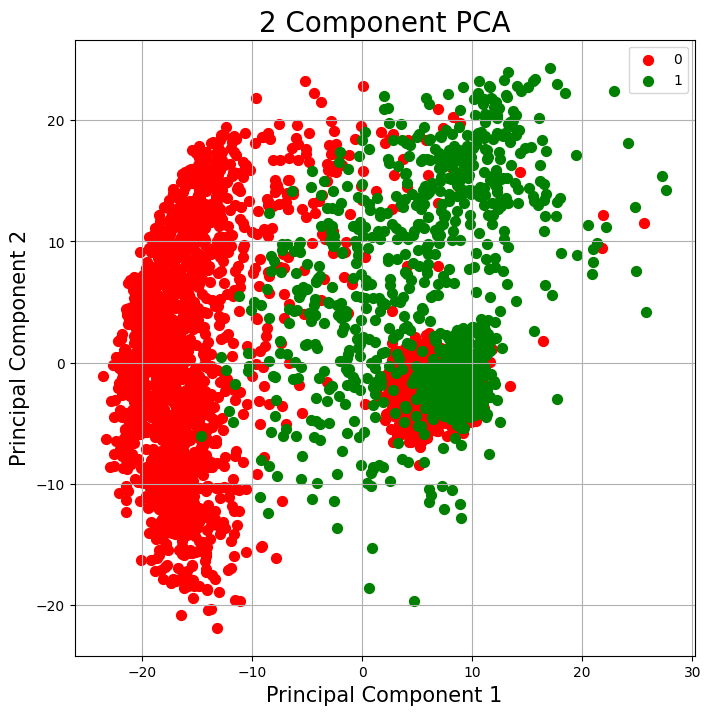

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = train_data.drop('labels', axis=1)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate with the labels
finalDf = pd.concat([principalDf, train_data[['labels']]], axis = 1)

# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()


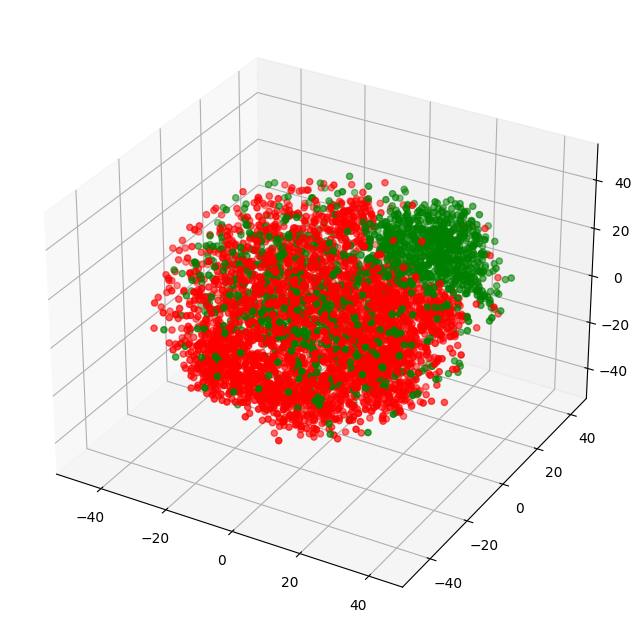

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE


features = train_data.drop('labels', axis=1)

# t-SNE
tsne = TSNE(n_components=3, random_state=0)
tsne_obj = tsne.fit_transform(features)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Z':tsne_obj[:,2],
                        'labels':train_data['labels']})

# Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
colors = {0:'red', 1:'green'}
ax.scatter(tsne_df['X'], tsne_df['Y'], tsne_df['Z'], c=tsne_df['labels'].apply(lambda x: colors[x]))
plt.show()


# no clarity found

# Model 15: NB Classifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X = train_data.drop('labels', axis=1)
y = train_data['labels']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# model
gnb = GaussianNB()


gnb.fit(X_train, y_train)

# predict
val_preds = gnb.predict(X_val)

# accuracy and f1 score
accuracy = accuracy_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)

print(f'Validation Accuracy: {accuracy}')
print(f'Validation F1 Score: {f1}')


Validation Accuracy: 0.6838095238095238
Validation F1 Score: 0.6139534883720931


# Model 16: Ensemble of NB, KNN, XGBoost (new 2nd best score)

## Bitgrit score: 0.95833333

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGBoost
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Ensemble
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('xgb', model_xgb)], voting='soft')

# Train
ensemble.fit(X_train, y_train)

# predict
val_preds_ensemble = ensemble.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Ensemble Validation Accuracy: 0.8428571428571429
Ensemble Validation F1 Score: 0.7368421052631579


In [ ]:
# Load the saved model
# ensemble = joblib.load('ensemble_model.pkl')


X_test = test_data.iloc[:, 1:]


predictions = ensemble.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_NB_KNN_XGB.csv', index=False)


# Model 17: Ensemble KNN, XGBoost  (it happens..!!)

## Bitgrit score: 0.9122807

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Gaussian Naive Bayes
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

#  Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGBoost
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

#  Ensemble

# ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('xgb', model_xgb)], voting='soft')
ensemble_knn_xgb = VotingClassifier(estimators=[ ('knn', knn), ('xgb', model_xgb)], voting='soft')

# Train
ensemble_knn_xgb.fit(X_train, y_train)

# predict
val_preds_ensemble_knn_xgb = ensemble_knn_xgb.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble_knn_xgb)
f1_ensemble = f1_score(y_val, val_preds_ensemble_knn_xgb)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Ensemble Validation Accuracy: 0.8876190476190476
Ensemble Validation F1 Score: 0.7366071428571428


In [ ]:
# ensemble = joblib.load('ensemble_model.pkl')

X_test = test_data.iloc[:, 1:]

predictions = ensemble_knn_xgb.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_KNN_XGB.csv', index=False)


# Model 18: MLP, NB, KNN, XGB

## Bitgrit score: 0.91083676



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=0)

# Gnb
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7,
                   'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# predict
nn_probs = model.predict(X_val).flatten()
gnb_probs = gnb.predict_proba(X_val)[:, 1]
knn_probs = knn.predict_proba(X_val)[:, 1]
xgb_probs = model_xgb.predict_proba(X_val)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
y_pred = np.where(average_probs > 0.5, 1, 0)

# accuracy and F1 Score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)
print('Validation F1 Score:', f1)


49/49 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9305194805194805
Validation F1 Score: 0.9326620516047829


In [ ]:
X_test = test_data.drop('id', axis=1).values


nn_probs = model.predict(X_test).flatten()
gnb_probs = gnb.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = model_xgb.predict_proba(X_test)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
predictions = np.where(average_probs > 0.5, 1, 0)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_ensembleof4.csv', index=False)


71/71 [==============================] - 0s 4ms/step


# As MLP is not contributing. Not using it below

# Model 19: Model staking NB, KNN, XGB and meta learner LogReg (3rd best model!!)

## Bitgrit score: 0.95530726

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gnb
gnb = GaussianNB()

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)

# XGBoost
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# Stack
estimators = [
    ('gnb', gnb),
    ('knn', knn),
    ('xgb', model_xgb)
]

# meta learner
logreg = LogisticRegression()

# hyperparameters for meta learner
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.1, 1, 10]}

clf = GridSearchCV(logreg, parameters)


stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=clf,
    cv=5
)

# Train
stacking_classifier.fit(X_train, y_train)

# predict
val_preds_stacking = stacking_classifier.predict(X_val)

# accuracy and f1 score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking)

print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Stacking Classifier Validation Accuracy: 0.9
Stacking Classifier Validation F1 Score: 0.7852760736196319


In [ ]:
X_test = test_data.drop('id', axis=1)


predictions = stacking_classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_stackedNB_KNN_XGB_meta_LOGREG_again.csv', index=False)


# Model 20: Model staking NB, KNN, XGB and meta learner Gradient Boostong classifier

## Bitgrit score: 0.95518207

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd


X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gnb
gnb = GaussianNB()

# knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

#  Stack
estimators = [
    ('gnb', gnb),
    ('knn', knn),
    ('xgb', model_xgb)
]

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# hyperparameters for meta learner
parameters = {
    "learning_rate": [0.1, 0.2],
    "min_samples_split": [0.1, 0.3],
    "max_depth": [3, 5],
    "max_features": ["sqrt"],
    "subsample": [0.8, 1.0],
    "n_estimators": [100, 200]
}

clf = GridSearchCV(gbc, parameters)

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=clf,
    cv=5
)

# Train
stacking_classifier.fit(X_train, y_train)

# predict
val_preds_stacking = stacking_classifier.predict(X_val)

# accuracy and f1 score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking)

# best parameters
print(f'Best parameters: {stacking_classifier.final_estimator_.best_params_}')



print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')

# Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.3, 'n_estimators': 200, 'subsample': 1.0}
# Stacking Classifier Validation Accuracy: 0.9
# Stacking Classifier Validation F1 Score: 0.7843942505133471

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.3, 'n_estimators': 200, 'subsample': 1.0}
Stacking Classifier Validation Accuracy: 0.9
Stacking Classifier Validation F1 Score: 0.7843942505133471


In [ ]:

X_test = test_data.drop('id', axis=1)


predictions = stacking_classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_stacked_NB_KNN_XGB_meta_GBC.csv', index=False)


# Model 21: Ensemble of KNN, XGB, GBC

## Bitgrit score: 0.88120301

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# GBC
best_params_gbc = {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.3, 'n_estimators': 200, 'subsample': 1.0}
model_gbc = GradientBoostingClassifier(**best_params_gbc)

# ensemble
ensemble = VotingClassifier(estimators=[('knn', knn), ('xgb', model_xgb), ('gbc', model_gbc)], voting='soft')

# Train
ensemble.fit(X_train, y_train)

# predict
val_preds_ensemble = ensemble.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Ensemble Validation Accuracy: 0.88
Ensemble Validation F1 Score: 0.7123287671232876


In [ ]:
X_test = test_data.drop('id', axis=1)

predictions = ensemble.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_ensemble_KNN_XGB_GBC.csv', index=False)


# contemplating life choices now

# Model 22: Model stacking of KNN, XGB, Log reg, meta learner as NBC. (Best model till now !!!)
## Bitgrit score: 0.95988935


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# KNN
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)

# XGB
best_params_xgb = {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# LogReg
logreg = LogisticRegression()

# Stack
estimators = [
    ('knn', knn),
    ('xgb', model_xgb),
    ('logreg', logreg)
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=GaussianNB(),
    cv=5
)

# Train
stacking_classifier.fit(X_train, y_train)

# predict
val_preds_stacking = stacking_classifier.predict(X_val)

# accuracy and f1 score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking)

print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.

Stacking Classifier Validation Accuracy: 0.8695238095238095
Stacking Classifier Validation F1 Score: 0.7486238532110093


In [ ]:
X_test = test_data.drop('id', axis=1)

test_preds_stacking = stacking_classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds_stacking
})

# Save the predictions to a CSV file
submission.to_csv('submission-KNN_XGB_Logreg_metaNBC.csv', index=False)



# Model 23: Model staking NB, KNN, XGB and meta learner LogReg but scaled again. (not worth it)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# Normalize
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GNB
gnb = GaussianNB()

# KNN
knn = KNeighborsClassifier()

# hyperparameters for KNN
parameters_knn = {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(knn, parameters_knn, cv=5)
grid_knn.fit(X_train, y_train)

# best KNN estimator
knn = grid_knn.best_estimator_

# XGB
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# hyperparameters for XGB
parameters_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05], 'max_depth': [5, 7], 'min_child_weight': [1, 5], 'gamma': [0, 0.1], 'colsample_bytree': [0.8, 1.0], 'subsample': [0.8, 1.0]}

grid_xgb = GridSearchCV(model_xgb, parameters_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

# best XGBoost estimator
model_xgb = grid_xgb.best_estimator_

# Stack
estimators = [
    ('gnb', gnb),
    ('knn', knn),
    ('xgb', model_xgb)
]

# meta learner
logreg = LogisticRegression()

# hyperparameters for meta learner
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [0.1, 1, 10]}

clf = GridSearchCV(logreg, parameters, cv=5)

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=clf,
    cv=5
)

# Train
stacking_classifier.fit(X_train, y_train)

# predict
val_preds_stacking = stacking_classifier.predict(X_val)

# accuracy and f1 score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking)

# best parameters
print(f'Best parameters for K-Nearest Neighbors: {grid_knn.best_params_}')
print(f'Best parameters for XGBoost: {grid_xgb.best_params_}')
print(f'Best parameters for Logistic Regression: {clf.best_params_}')

# accuracy and f1 score
print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

# knn
knn = KNeighborsClassifier()

# hyperparameters for KNN
parameters_knn = {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(knn, parameters_knn, cv=5)
grid_knn.fit(X_train, y_train)

# best KNN estimator
knn = grid_knn.best_estimator_

print(f'Best parameters for K-Nearest Neighbors: {grid_knn.best_params_}')

# predict
val_preds_knn = knn.predict(X_val)

# accuracy and F1 score
accuracy_knn = accuracy_score(y_val, val_preds_knn)
f1_knn = f1_score(y_val, val_preds_knn)

print(f'Validation Accuracy for K-Nearest Neighbors: {accuracy_knn}')
print(f'Validation F1 Score for K-Nearest Neighbors: {f1_knn}')


Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Validation Accuracy for K-Nearest Neighbors: 0.8790476190476191
Validation F1 Score for K-Nearest Neighbors: 0.7381443298969071


## XGB scaled (not helpfull)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# seed
np.random.seed(0)

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# XGB
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# hyperparameters for XGB
parameters_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'lambda': [1, 1.5],
    'alpha': [0, 0.1, 0.5]
}

randomized_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=parameters_xgb,
    scoring='accuracy',
    cv=3,
    n_iter=20,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# train
randomized_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)])

# best parameters
best_params = randomized_search.best_params_
print(f'Best parameters: {best_params}')

# best estimator
best_xgb = randomized_search.best_estimator_

# predict
val_preds = best_xgb.predict(X_val)

# accuracy and F1 score
accuracy = accuracy_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)

print(f'Validation accuracy: {accuracy}')
print(f'Validation F1 score: {f1}')


# Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
# Validation accuracy: 0.8542857142857143
# Validation F1 score: 0.6348448687350835

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64596
[1]	validation_0-logloss:0.60694
[2]	validation_0-logloss:0.57410
[3]	validation_0-logloss:0.54577
[4]	validation_0-logloss:0.52119
[5]	validation_0-logloss:0.50073
[6]	validation_0-logloss:0.48188
[7]	validation_0-logloss:0.46585
[8]	validation_0-logloss:0.45168
[9]	validation_0-logloss:0.43841
[10]	validation_0-logloss:0.42570
[11]	validation_0-logloss:0.41385
[12]	validation_0-logloss:0.40372
[13]	validation_0-logloss:0.39571
[14]	validation_0-logloss:0.38770
[15]	validation_0-logloss:0.38014
[16]	validation_0-logloss:0.37401
[17]	validation_0-logloss:0.36905
[18]	validation_0-logloss:0.36378
[19]	validation_0-logloss:0.35927
[20]	validation_0-logloss:0.35427
[21]	validation_0-logloss:0.35004
[22]	validation_0-logloss:0.34657
[23]	validation_0-logloss:0.34323
[24]	validation_0-logloss:0.33895
[25]	validation_0-logloss:0.33654
[26]	validation_0-logloss:0.33356
[27]	validation_0-logloss:0.33078
[28]	validation_0-logloss:0.32832
[29]	validation_0-loglos

In [ ]:
X_test = test_data.drop('id', axis=1)

X_test_scaled = scaler.transform(X_test)

predictions = best_xgb.predict(X_test_scaled)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_XGB_scaled.csv', index=False)


## XGB unscaled

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd

# seed
np.random.seed(0)

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# XGB with best params
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    subsample=0.8,
                    n_estimators=100,
                    min_child_weight=3,
                    max_depth=5,
                    learning_rate=0.1,
                    lambda_reg=1.5,
                    gamma=0.1,
                    colsample_bytree=0.8,
                    alpha=0.1)

# train
xgb.fit(X_train, y_train)

# predict
val_preds = xgb.predict(X_val)

# accuracy and F1 score
accuracy = accuracy_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)

print(f'Validation accuracy: {accuracy}')
print(f'Validation F1 score: {f1}')


X_test = test_data.drop('id', axis=1)

predictions = xgb.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_XGB_unscaled.csv', index=False)

# older version {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

# Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
# Validation accuracy: 0.8542857142857143
# Validation F1 score: 0.6348448687350835

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[22:55:21] WARNING: ../src/learner.cc:767: 
Parameters: { "lambda_reg" } are not used.

Validation accuracy: 0.8685714285714285
Validation F1 score: 0.6805555555555556


# Model 24: Model staking KNN, XGB, LogReg with meta as NBC. But more tuning.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
import joblib

# Load models
logreg_model = joblib.load('/content/drive/MyDrive/Competition/logreg_model.pkl')
knn_model = joblib.load('/content/drive/MyDrive/Competition/knn_model.pkl')
xgb_model = joblib.load('/content/drive/MyDrive/Competition/xgb_model.pkl')

# stacking classifier
estimators = [
    ('lr', logreg_model),
    ('knn', knn_model),
    ('xgb', xgb_model)
]
clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())

# Fit
clf.fit(X_train_new, y_train_new)

# Save the stacked model
joblib.dump(clf, '/content/drive/MyDrive/Competition/stacked_model.pkl')

# Load the stacked model
loaded_stacked_model = joblib.load('/content/drive/MyDrive/Competition/stacked_model.pkl')

# Predict
y_val_pred = loaded_stacked_model.predict(X_val)

# accuracy and F1 score
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f'Stacked Validation Accuracy: {val_accuracy}')
print(f'Stacked Validation F1 Score: {val_f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

Stacked Validation Accuracy: 0.7504761904761905
Stacked Validation F1 Score: 0.7623778465862924


In [ ]:
X_test = test_data.drop('id', axis=1)

# Predict
test_preds_stacking = loaded_stacked_model.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds_stacking
})

submission.to_csv('submission-KNN_XGB_Logreg_metaNBC_2.csv', index=False)


## using smote on XGB model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE



X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

# Hyperparameter grid
param_grid_xgb = {
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150, 200],
    'min_child_weight': [1, 2, 3, 4, 5],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4]
}


model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist')
search_xgb = RandomizedSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_iter=10)
search_xgb.fit(X_train_new, y_train_new)

# Best parameters
print(f'Best parameters for XGB: {search_xgb.best_params_}')



import joblib
# Save  model
joblib.dump(search_xgb.best_estimator_, '/content/drive/MyDrive/Competition/xgb_model.pkl')

# Load  model
loaded_model = joblib.load('/content/drive/MyDrive/Competition/xgb_model.pkl')



# Predict
y_train_pred = loaded_model.predict(X_train_new)

# accuracy and F1 score
train_accuracy = accuracy_score(y_train_new, y_train_pred)
train_f1 = f1_score(y_train_new, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training F1 Score: {train_f1}')


# Predict validation data
y_val_pred = loaded_model.predict(X_val)

# accuracy and F1 score
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation F1 Score: {val_f1}')

# Best parameters for XGB: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.4, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.8}
# Training Accuracy: 1.0
# Training F1 Score: 1.0
# Validation Accuracy: 0.8533333333333334
# Validation F1 Score: 0.6920000000000001


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Best parameters for XGB: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.4, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.8}
Training Accuracy: 1.0
Training F1 Score: 1.0
Validation Accuracy: 0.8533333333333334
Validation F1 Score: 0.6920000000000001


## knn

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
sm = SMOTE(random_state=42)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

# Hyperparameter
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
search_knn = RandomizedSearchCV(knn, param_grid_knn, n_iter=100, cv=5, scoring='accuracy', verbose=2, random_state=42)
search_knn.fit(X_train_new, y_train_new)

# Best parameters
print(f'Best parameters for KNN: {search_knn.best_params_}')

# Save the model
joblib.dump(search_knn.best_estimator_, '/content/drive/MyDrive/Competition/knn_model.pkl')

# Load the model
loaded_model = joblib.load('/content/drive/MyDrive/Competition/knn_model.pkl')

# Predict
y_val_pred = loaded_model.predict(X_val)

# accuracy and F1 score
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation F1 Score: {val_f1}')


#old best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
# Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
# Validation Accuracy: 0.5923809523809523
# Validation F1 Score: 0.6030351940170534


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..metric=euclidean, n_neighbors=23, weights=uniform; total time=   2.0s
[CV] END ..metric=euclidean, n_neighbors=23, weights=uniform; total time=   1.4s
[CV] END ..metric=euclidean, n_neighbors=23, weights=uniform; total time=   1.6s
[CV] END ..metric=euclidean, n_neighbors=23, weights=uniform; total time=   1.6s
[CV] END ..metric=euclidean, n_neighbors=23, weights=uniform; total time=   1.6s
[CV] END .metric=euclidean, n_neighbors=24, weights=distance; total time=   1.4s
[CV] END .metric=euclidean, n_neighbors=24, weights=distance; total time=   2.0s
[CV] END .metric=euclidean, n_neighbors=24, weights=distance; total time=   2.7s
[CV] END .metric=euclidean, n_neighbors=24, weights=distance; total time=   2.1s
[CV] END .metric=euclidean, n_neighbors=24, weights=distance; total time=   1.7s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.5s
[CV] END ...metric=euclidean, n_neighbors=3, w

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# KNN
best_params_knn = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params_knn)

# XGB
best_params_xgb = {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# LogReg
best_params_logreg = {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 166.81005372000558}
logreg = LogisticRegression(**best_params_logreg)

# Stacking
estimators = [
    ('knn', knn),
    ('xgb', model_xgb),
    ('logreg', logreg)
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=GaussianNB(),
    cv=5
)

# Train
stacking_classifier.fit(X_train, y_train)

# Predict
val_preds_stacking = stacking_classifier.predict(X_val)

# Accuracy and F1 Score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking, average='weighted')

print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: Convergence

Stacking Classifier Validation Accuracy: 0.8257142857142857
Stacking Classifier Validation F1 Score: 0.8230342480069274


In [ ]:
X_test = test_data.drop('id', axis=1)

test_preds_stacking = stacking_classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds_stacking
})

submission.to_csv('submission-KNN_XGB_Logreg_metaNBC_4.csv', index=False)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# KNN
best_params_knn = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params_knn)

# XGB
best_params_xgb = {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# LogReg
best_params_logreg = {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 166.81005372000558}
logreg = LogisticRegression(**best_params_logreg)

# GaussianNB
gnb = GaussianNB()

# Ensemble
ensemble_clf = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('xgb', model_xgb),
        ('logreg', logreg),
        ('gnb', gnb)
    ],
    voting='hard'
)

# Train
ensemble_clf.fit(X_train, y_train)

# Predict
val_preds_ensemble = ensemble_clf.predict(X_val)

# Accuracy and F1 Score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble, average='weighted')

print(f'Ensemble Classifier Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Classifier Validation F1 Score: {f1_ensemble}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ensemble Classifier Validation Accuracy: 0.8580952380952381
Ensemble Classifier Validation F1 Score: 0.8523575737830156


In [ ]:
X_test = test_data.drop('id', axis=1)

test_preds_ensemble = ensemble_clf.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds_ensemble
})

submission.to_csv('submission-ensemble_5.csv', index=False)


# Model 25: Tabnet. Last model (i give up)
## Bitgrit score: 0.66993865

In [ ]:
import torch
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier

X = train_data.drop(['labels'], axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE f
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Convert to NumPy arrays
X_train_numpy = X_train.values.astype(np.float32)
y_train_numpy = y_train.values.astype(np.float32)
X_val_numpy = X_val.values.astype(np.float32)
y_val_numpy = y_val.values.astype(np.float32)

random.seed(42)

# best parameters
param_dict = {'n_steps': 3, 'n_shared': 2, 'n_independent': 2, 'n_d': 8, 'n_a': 16, 'lambda_sparse': 0.1, 'gamma': 1.0}
clf = TabNetClassifier(**param_dict)

best_clf = clf.fit(
    X_train_numpy, y_train_numpy,
    eval_set=[(X_val_numpy, y_val_numpy)],
    max_epochs=1000,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    weights=1,
)

print("Best parameters: ", param_dict)

# Predict
y_val_pred = clf.predict_proba(X_val_numpy)

# accuracy and f1 score
accuracy = accuracy_score(y_val_numpy, y_val_pred.argmax(axis=1))
f1 = f1_score(y_val_numpy, y_val_pred.argmax(axis=1), average='weighted')

print("Accuracy: ", accuracy)
print("F1 score: ", f1)







/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.82992 | val_0_auc: 0.71775 |  0:00:01s
epoch 1  | loss: 0.64146 | val_0_auc: 0.80327 |  0:00:02s
epoch 2  | loss: 0.52733 | val_0_auc: 0.80508 |  0:00:04s
epoch 3  | loss: 0.44881 | val_0_auc: 0.83322 |  0:00:06s
epoch 4  | loss: 0.42123 | val_0_auc: 0.83988 |  0:00:08s
epoch 5  | loss: 0.3983  | val_0_auc: 0.83781 |  0:00:09s
epoch 6  | loss: 0.35457 | val_0_auc: 0.84885 |  0:00:10s
epoch 7  | loss: 0.33786 | val_0_auc: 0.85484 |  0:00:11s
epoch 8  | loss: 0.33402 | val_0_auc: 0.85948 |  0:00:12s
epoch 9  | loss: 0.30503 | val_0_auc: 0.86407 |  0:00:13s
epoch 10 | loss: 0.286   | val_0_auc: 0.86275 |  0:00:15s
epoch 11 | loss: 0.25173 | val_0_auc: 0.85949 |  0:00:17s
epoch 12 | loss: 0.24143 | val_0_auc: 0.85963 |  0:00:22s
epoch 13 | loss: 0.22083 | val_0_auc: 0.85923 |  0:00:24s
epoch 14 | loss: 0.22478 | val_0_auc: 0.85482 |  0:00:25s
epoch 15 | loss: 0.22976 | val_0_auc: 0.85939 |  0:00:26s
epoch 16 | loss: 0.21084 | val_0_auc: 0.84994 |  0:00:28s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Best parameters:  {'n_steps': 3, 'n_shared': 2, 'n_independent': 2, 'n_d': 8, 'n_a': 16, 'lambda_sparse': 0.1, 'gamma': 1.0}
Accuracy:  0.7704761904761904
F1 score:  0.7768428454918285


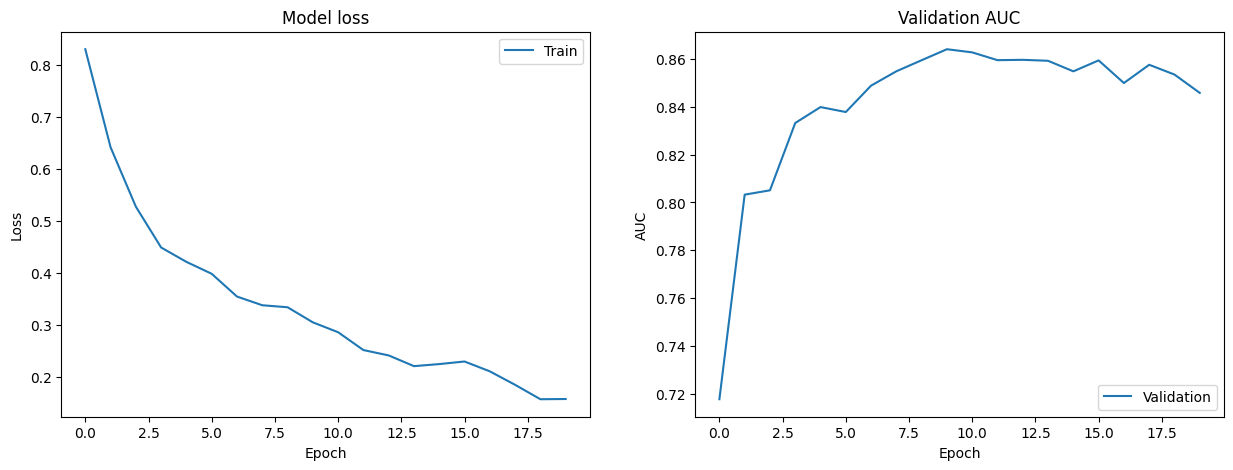

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot losses
axs[0].plot(clf.history.history['loss'])
axs[0].set_title('Model loss')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend(['Train'], loc='upper right')

# plot validation AUC
axs[1].plot(clf.history.history['val_0_auc'])
axs[1].set_title('Validation AUC')
axs[1].set(xlabel='Epoch', ylabel='AUC')
axs[1].legend(['Validation'], loc='lower right')

plt.show()


In [ ]:
X_test = test_data.drop('id', axis=1)

# Convert to NumPy array
X_test_numpy = X_test.values.astype(np.float32)

# Predict
test_preds_proba = clf.predict_proba(X_test_numpy)

test_preds = np.argmax(test_preds_proba, axis=1)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds
})

submission.to_csv('submission_TabNet1.csv', index=False)


# Model 26: Another model staking (well...again not good on bitgrit)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import Callback
from keras import regularizers

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# scale_pos_weight for imbalanced classes
scale_pos_weight = sum(y == 0) / sum(y == 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_neural_network():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0, callbacks=[CustomEarlyStopping()])

def get_stacking():
    # level-0 models
    level0 = list()
    level0.append(('cat1', make_pipeline(PCA(n_components=100), CatBoostClassifier(verbose=0, random_state=42, scale_pos_weight=scale_pos_weight))))
    level0.append(('cat2', make_pipeline(PCA(n_components=100), CatBoostClassifier(verbose=0, learning_rate=0.01, random_state=42, scale_pos_weight=scale_pos_weight))))
    level0.append(('xgb1', make_pipeline(PCA(n_components=100), XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight))))
    level0.append(('lr', LogisticRegression()))
    level0.append(('nn', keras_clf))

    # meta learner model
    level1 = LogisticRegression()

    # stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# train
model = get_stacking()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


<ipython-input-30-ccfe767fb6d7>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0, callbacks=[CustomEarlyStopping()])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Reached 90% accuracy so cancelling training!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Reached 90% accuracy so cancelling training!
27/27 [==============================] - 0s 2ms/step

Reached 90% accuracy so cancelling training!
27/27 [==============================] - 0s 3ms/step

Reached 90% accuracy so cancelling training!
27/27 [==============================] - 0s 2ms/step

Reached 90% accuracy so cancelling training!
27/27 [==============================] - 0s 2ms/step

Reached 90% accuracy so cancelling training!
33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       781
           1       0.82      0.70      0.75       269

    accuracy                           0.88      1050
   macro avg       0.86      0.82      0.84      1050
weighted avg       0.88      0.88      0.88      1050

[[739  42]
 [ 81 188]]


In [ ]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8828571428571429
0.7535070140280561


In [ ]:
X_test_unseen = test_data.drop('id', axis=1)

test_preds = model.predict(X_test_unseen)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds
})

submission.to_csv('submission_wired_stacking_model.csv', index=False)


71/71 [==============================] - 0s 3ms/step


In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import Callback

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# scale_pos_weight for imbalanced classes
scale_pos_weight = sum(y == 0) / sum(y == 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_neural_network(dropout_rate=0.1, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid')) # binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0)

def get_stacking():
    # level-0 models
    level0 = list()
    level0.append(('cat1', make_pipeline(PCA(n_components=100), CatBoostClassifier(verbose=0, random_state=42, scale_pos_weight=scale_pos_weight))))
    level0.append(('cat2', make_pipeline(PCA(n_components=100), CatBoostClassifier(verbose=0, learning_rate=0.01, random_state=42, scale_pos_weight=scale_pos_weight))))
    level0.append(('xgb1', make_pipeline(PCA(n_components=100), XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0))))
    level0.append(('lr', LogisticRegression()))
    level0.append(('nn', keras_clf))
    level0.append(('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1, weights='uniform'))) # adding KNN with new params
    level0.append(('nb', GaussianNB())) # adding Naive Bayes

    # meta learner model
    level1 = LogisticRegression(max_iter=10000)

    # stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# train
model = get_stacking()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("f1-score:", f1_score(y_test, y_pred))


<ipython-input-47-d6b913ca6e1d>:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       781
           1       0.85      0.71      0.77       269

    accuracy                           0.89      1050
   macro avg       0.88      0.83      0.85      1050
weighted avg       0.89      0.89      0.89      1050

[[747  34]
 [ 79 190]]
accuracy: 0.8923809523809524
f1-score: 0.7707910750507099


In [ ]:
X_test_unseen = test_data.drop('id', axis=1)

test_preds = model.predict(X_test_unseen)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds
})

submission.to_csv('submission_wired_stacking_model3.csv', index=False)


71/71 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

X = train_data.drop('labels', axis=1)
y = train_data['labels']

# scale_pos_weight for imbalanced classes
scale_pos_weight = sum(y == 0) / sum(y == 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_neural_network(neurons=10, dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0)

# parameters
param_grid = {
    'neurons': [10, 20],
    'dropout_rate': [0.1, 0.2]
}

grid = GridSearchCV(estimator=keras_clf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-40-a40f6e2dcfd5>:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_neural_network, epochs=50, batch_size=10, verbose=0)


Best: 0.819524 using {'dropout_rate': 0.1, 'neurons': 10}
0.819524 (0.006760) with: {'dropout_rate': 0.1, 'neurons': 10}
0.800476 (0.005095) with: {'dropout_rate': 0.1, 'neurons': 20}
0.817381 (0.006835) with: {'dropout_rate': 0.2, 'neurons': 10}
0.817619 (0.003883) with: {'dropout_rate': 0.2, 'neurons': 20}


### Reshaping and doing transformations

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.values.reshape(-1,20,20,3)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    shear_range=0.2,
    )

datagen.fit(X_train_1)

# difference between class counts
diff = X_train_0.shape[0] - X_train_1.shape[0]

# transform images
X_train_gen = X_train_1.copy()
y_train_gen = y_train_1.copy()

batch_size = 64
batches = 0
for X_batch, y_batch in datagen.flow(X_train_1, y_train_1, batch_size=batch_size):
    X_train_gen = np.concatenate((X_train_gen, X_batch))
    y_train_gen = np.concatenate((y_train_gen, y_batch))
    batches += batch_size
    if batches >= diff:
        break

# Concatenate original majority class with generated minority class
X_train_balanced = np.concatenate((X_train_0, X_train_gen))
y_train_balanced = np.concatenate((y_train_0, y_train_gen))

# reshape
X_train_balanced = X_train_balanced.reshape(-1, 1200)

print(X_train_balanced.shape)
print(y_train_balanced.shape)


(6152, 1200)
(6152,)


### finding best parameters for knn and xgb

In [ ]:
# finding best parameters for knn and xgb


from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# hyperparameters
param_dist_knn = {'n_neighbors': list(range(1,30)),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski'],
                  'p': [1, 2]}

param_dist_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': list(range(1,10)),
    'min_child_weight': list(range(1,7)),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.8, 1.0],
    'tree_method': ['gpu_hist'],  # use GPU
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'reg_lambda': [0.1, 1, 5, 10, 50, 100]}


# KNN
knn = KNeighborsClassifier()

# XGB
xgb = XGBClassifier()

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn, n_iter=50, cv=5, verbose=3, n_jobs=-1)

random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=5, verbose=3, n_jobs=-1)

# fit
random_search_knn.fit(X_train_balanced, y_train_balanced)
random_search_xgb.fit(X_train_balanced, y_train_balanced)

# best parameters
print("Best parameters for KNN: ", random_search_knn.best_params_)
print("Best parameters for XGBoost: ", random_search_xgb.best_params_)

# Best parameters for KNN:  {'weights': 'distance', 'p': 2, 'n_neighbors': 2, 'metric': 'manhattan'}
# Best parameters for XGBoost:  {'tree_method': 'gpu_hist', 'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for KNN:  {'weights': 'distance', 'p': 2, 'n_neighbors': 2, 'metric': 'manhattan'}
Best parameters for XGBoost:  {'tree_method': 'gpu_hist', 'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


### finding best parameters for  Logreg

In [ ]:
# Logreg

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_dist_lr = {'penalty': ['l2', 'none'],
                 'C': np.logspace(-4, 4, 20),
                 'solver': ['newton-cg', 'lbfgs', 'sag']}
param_dist_lr_liblinear = {'penalty': ['l1', 'l2'],
                           'C': np.logspace(-4, 4, 20),
                           'solver': ['liblinear']}
param_dist_lr_saga = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                      'C': np.logspace(-4, 4, 20),
                      'l1_ratio': np.arange(0.0, 1.0, 0.1),
                      'solver': ['saga']}

# Concatenate
param_dist_lr_total = [param_dist_lr, param_dist_lr_liblinear, param_dist_lr_saga]

# LogReg
lr = LogisticRegression()

random_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr_total, n_iter=50, cv=5, verbose=2, n_jobs=-1)

random_search_lr.fit(X_train_balanced, y_train_balanced)

print("Best parameters for Logistic Regression: ", random_search_lr.best_params_)


# Best parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 0.4, 'C': 0.0006951927961775605}


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 0.4, 'C': 0.0006951927961775605}


### running the model again

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.values.reshape(-1,20,20,3)


X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    shear_range=0.2,
    )

datagen.fit(X_train_1)

# difference between class counts
diff = X_train_0.shape[0] - X_train_1.shape[0]

# transform images
X_train_gen = X_train_1.copy()
y_train_gen = y_train_1.copy()

batch_size = 64
batches = 0
for X_batch, y_batch in datagen.flow(X_train_1, y_train_1, batch_size=batch_size):
    X_train_gen = np.concatenate((X_train_gen, X_batch))
    y_train_gen = np.concatenate((y_train_gen, y_batch))
    batches += batch_size
    if batches >= diff:
        break

# Concatenate original majority class with generated minority class
X_train_balanced = np.concatenate((X_train_0, X_train_gen))
y_train_balanced = np.concatenate((y_train_0, y_train_gen))

# reshape
X_train_balanced = X_train_balanced.reshape(-1, 1200)

print(X_train_balanced.shape)
print(y_train_balanced.shape)

# KNN
# best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
best_params = {'metric': 'manhattan', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
knn = KNeighborsClassifier(**best_params)

# XGB
# best_params_xgb = {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
best_params_xgb = {'tree_method': 'gpu_hist', 'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')


# LogReg
best_params_logreg = {'solver': 'saga', 'penalty': 'l2', 'C': 0.0006951927961775605}
# logreg = LogisticRegression(solver=best_params_logreg['solver'],
#                               penalty=best_params_logreg['penalty'],
#                               C=best_params_logreg['C'])

logreg = LogisticRegression()

# Stack
estimators = [
    ('knn', knn),
    ('xgb', model_xgb),
    ('logreg', logreg)
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=GaussianNB(),
    cv=5
)

# Train
stacking_classifier.fit(X_train_balanced, y_train_balanced)

# predict
val_preds_stacking = stacking_classifier.predict(X_val)

# accuracy and f1 score
accuracy_stacking = accuracy_score(y_val, val_preds_stacking)
f1_stacking = f1_score(y_val, val_preds_stacking)

print(f'Stacking Classifier Validation Accuracy: {accuracy_stacking}')
print(f'Stacking Classifier Validation F1 Score: {f1_stacking}')


(6152, 1200)
(6152,)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Stacking Classifier Validation Accuracy: 0.8304761904761905
Stacking Classifier Validation F1 Score: 0.7244582043343653


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
X_test = test_data.drop('id', axis=1)

test_preds_stacking = stacking_classifier.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": test_preds_stacking
})

submission.to_csv('submission-wierd5.csv', index=False)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### another model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.values.reshape(-1,20,20,3)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    shear_range=0.2,
    )

datagen.fit(X_train_1)

# difference between class counts
diff = X_train_0.shape[0] - X_train_1.shape[0]


X_train_gen = X_train_1.copy()
y_train_gen = y_train_1.copy()

batch_size = 64
batches = 0
for X_batch, y_batch in datagen.flow(X_train_1, y_train_1, batch_size=batch_size):
    X_train_gen = np.concatenate((X_train_gen, X_batch))
    y_train_gen = np.concatenate((y_train_gen, y_batch))
    batches += batch_size
    if batches >= diff:
        break

# Concatenate original majority class with generated minority class
X_train_balanced = np.concatenate((X_train_0, X_train_gen))
y_train_balanced = np.concatenate((y_train_0, y_train_gen))

# reshape
X_train_balanced = X_train_balanced.reshape(-1, 1200)

print(X_train_balanced.shape)
print(y_train_balanced.shape)


# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train_balanced, y_train_balanced)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_balanced, y_train_balanced)

# Ensemble
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('xgb', model_xgb)], voting='soft')

# Train
ensemble.fit(X_train_balanced, y_train_balanced)

# predict
val_preds_ensemble = ensemble.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')


(6152, 1200)
(6152,)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Ensemble Validation Accuracy: 0.7790476190476191
Ensemble Validation F1 Score: 0.6847826086956522


In [ ]:
# Load the saved model
# ensemble = joblib.load('ensemble_model.pkl')


X_test = test_data.iloc[:, 1:]


predictions = ensemble.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_weird7.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1)
y = train_data['labels']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.values.reshape(-1,20,20,3)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    shear_range=0.2,
    )

datagen.fit(X_train_0)
datagen.fit(X_train_1)

def create_balanced_class(X_train_class, y_train_class):
    X_train_gen = X_train_class.copy()
    y_train_gen = y_train_class.copy()

    batch_size = 64
    batches = 0
    for X_batch, y_batch in datagen.flow(X_train_class, y_train_class, batch_size=batch_size):
        X_train_gen = np.concatenate((X_train_gen, X_batch))
        y_train_gen = np.concatenate((y_train_gen, y_batch))
        batches += batch_size
        if X_train_gen.shape[0] >= max(X_train_0.shape[0], X_train_1.shape[0]):  # Balance classes
            break

    return X_train_gen, y_train_gen

X_train_balanced_0, y_train_balanced_0 = create_balanced_class(X_train_0, y_train_0)
X_train_balanced_1, y_train_balanced_1 = create_balanced_class(X_train_1, y_train_1)

X_train_balanced = np.concatenate((X_train_balanced_0, X_train_balanced_1))
y_train_balanced = np.concatenate((y_train_balanced_0, y_train_balanced_1))

# Reshape
X_train_balanced = X_train_balanced.reshape(-1, 1200)

print(X_train_balanced.shape)
print(y_train_balanced.shape)

# MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_balanced.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=0)

# Gnb
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train_balanced, y_train_balanced)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, eval_metric='logloss')
model_xgb.fit(X_train_balanced, y_train_balanced)

# predict
nn_probs = model.predict(X_val).flatten()
gnb_probs = gnb.predict_proba(X_val)[:, 1]
knn_probs = knn.predict_proba(X_val)[:, 1]
xgb_probs = model_xgb.predict_proba(X_val)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
y_pred = np.where(average_probs > 0.5, 1, 0)

# accuracy and F1 Score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)
print('Validation F1 Score:', f1)


X_test = test_data.drop('id', axis=1).values


nn_probs = model.predict(X_test).flatten()
gnb_probs = gnb.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = model_xgb.predict_proba(X_test)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
predictions = np.where(average_probs > 0.5, 1, 0)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_weird11.csv', index=False)


(6280, 1200)
(6280,)
33/33 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Validation Accuracy: 0.7961904761904762
Validation F1 Score: 0.6994382022471909
71/71 [==============================] - 0s 2ms/step


### downsample and upweight

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsample majority class
downsample_factor = 10
X_train_downsampled = X_train.sample(frac=1/downsample_factor, random_state=42)
y_train_downsampled = y_train.loc[X_train_downsampled.index]

# weights of downsampled data
weights_downsampled = np.where(y_train_downsampled == 0, 1, downsample_factor)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_downsampled, y_train_downsampled, sample_weight=weights_downsampled)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train_downsampled, y_train_downsampled)

# XGB
best_params_xgb = {'colsample_bytree': 0.6154469128110744, 'learning_rate': 0.0823076398078035, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 363, 'subsample': 0.5171942605576092}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_downsampled, y_train_downsampled, sample_weight=weights_downsampled)

# LogReg- Adaptive learning rate
logistic_regression = SGDClassifier(loss='log', learning_rate='adaptive', eta0=0.1)
logistic_regression.fit(X_train_downsampled, y_train_downsampled, sample_weight=weights_downsampled)

# Ensemble
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('xgb', model_xgb), ('lr', logistic_regression)], voting='hard')

# Train
ensemble.fit(X_train_downsampled, y_train_downsampled)

# predict
val_preds_ensemble = ensemble.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Ensemble Validation Accuracy: 0.84
Ensemble Validation F1 Score: 0.65


In [ ]:
X_test = test_data.iloc[:, 1:]


predictions = ensemble.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_weird12.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

X = train_data.drop('labels', axis=1)
y = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

# Train
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGBoost
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Ensemble
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('knn', knn), ('xgb', model_xgb)], voting='hard')

# Train
ensemble.fit(X_train, y_train)

# predict
val_preds_ensemble = ensemble.predict(X_val)

# accuracy and f1 score
accuracy_ensemble = accuracy_score(y_val, val_preds_ensemble)
f1_ensemble = f1_score(y_val, val_preds_ensemble)

print(f'Ensemble Validation Accuracy: {accuracy_ensemble}')
print(f'Ensemble Validation F1 Score: {f1_ensemble}')

X_test = test_data.iloc[:, 1:]


predictions = ensemble.predict(X_test)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})


submission.to_csv('submission_weird12.csv', index=False)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Ensemble Validation Accuracy: 0.8685714285714285
Ensemble Validation F1 Score: 0.7206477732793523


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=0)

# Gnb
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7,
                   'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# predict
nn_probs = model.predict(X_val).flatten()
gnb_probs = gnb.predict_proba(X_val)[:, 1]
knn_probs = knn.predict_proba(X_val)[:, 1]
xgb_probs = model_xgb.predict_proba(X_val)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
y_pred = np.where(average_probs > 0.5, 1, 0)

# accuracy and F1 Score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)
print('Validation F1 Score:', f1)

X_test = test_data.drop('id', axis=1).values


nn_probs = model.predict(X_test).flatten()
gnb_probs = gnb.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = model_xgb.predict_proba(X_test)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
predictions = np.where(average_probs > 0.4, 1, 0)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_w15.csv', index=False)


49/49 [==============================] - 0s 2ms/step
Validation Accuracy: 0.9292207792207792
Validation F1 Score: 0.931747025673137
71/71 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X = train_data.drop('labels', axis=1).values
y = train_data['labels'].values

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=0)

# Gnb
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Knn
best_params = {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# XGB
best_params_xgb = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7,
                   'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_params_xgb, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# predict
nn_probs = model.predict(X_val).flatten()
gnb_probs = gnb.predict_proba(X_val)[:, 1]
knn_probs = knn.predict_proba(X_val)[:, 1]
xgb_probs = model_xgb.predict_proba(X_val)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
y_pred = np.where(average_probs > 0.6, 1, 0)

# accuracy and F1 Score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)
print('Validation F1 Score:', f1)

X_test = test_data.drop('id', axis=1).values


nn_probs = model.predict(X_test).flatten()
gnb_probs = gnb.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = model_xgb.predict_proba(X_test)[:, 1]

average_probs = (nn_probs + gnb_probs + knn_probs + xgb_probs) / 4
predictions = np.where(average_probs > 0.7, 1, 0)

# submission
submission = pd.DataFrame({
    "id": test_data['id'],
    "labels": predictions
})

submission.to_csv('submission_w16.csv', index=False)


49/49 [==============================] - 0s 2ms/step
Validation Accuracy: 0.9415584415584416
Validation F1 Score: 0.9410994764397906
71/71 [==============================] - 0s 2ms/step
